## <center>Actividad 3 - Análisis exploratorio de datos + Machine Learning</center>

Estudiantes: Rubén Martínez Gormaz | Samuel Fernando Méndez | Ruoyan Zhang | Lian Salmerón López

## Grupo 6

En esta actividad se pide realizar un análisis profundo sobre un conjunto de datos de un tema de negocio, para llevar a cabo un procesamiento de la información y entrenar un modelo de aprendizaje automático, que consiga predecir los siguientes valores del conjunto de datos.

Para esta activiad se ha escogido el tema del precio de los combustibles en España durante el 2022.

## <center><u>Contexto</u></center>

## <center><u>Objetivos</u></center>

Los objetivos generales de este proyecto es realizar un estudio a partir de un dataset sobre los precios de cada carburante en España y emplear sobre estos datos algoritmos de Machine Learning para predecir el precio de un carburante.

Antes de trabajar con los modelos predictivos, realizaremos un estudio preliminar con el dataset para mostrar una serie de gráficas que nos permita mostrar el precio medio de cada carburante a lo largo del tiempo. Con esto podremos eliminar aquellos datos que no sean útiles para este estudio, y preparar un conjunto de datos para la fase de entrenamiento de los modelos predictivos.

Los objetivos específicos serán:

    - Análisis y manipulación de datos con dataframes (Pandas)
    - Representación de datos mediante gráficas (Matplotlib , Seaborn)
    - Construcción de modelos predictivos con algoritmos de machine learning (sklearn)
        - Regresión logística
        - K-NN
        - Random Forest
        -Regresión lineal

## <center><u>Instalación de librerías</u></center>

Las librerías utilizadas para esta investigación son las siguientes, si no se tiene alguna de ellas, debe ejecutar la siguiente línea.

In [ ]:
## Dejar para librerias nuevas que utilicemos

Una vez instaladas, se importan al proyecto.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias para los algortimos
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

- La librería <b>pandas</b> se especializa en la manipulación y análisis de datos. Ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales. <br>
- La librería <b>numpy</b> ofrece la posibilidad de crear vectores y matrices grandes multidimensionales, junto con una gran colección de funciones matemáticas.<br>
- La libería <b>os</b>  provee una manera versátil de usar funcionalidades dependientes del sistema operativo.
- La libería <b>matplotlib</b> permite lageneración de gráficos en dos dimensiones, a partir de datos contenidos en listas o arrays en el lenguaje de programación.
- La librería <b>seaborn</b> se basa en la librería <b>matplotlib</b> para la visualización de datos, ofreciendo una interfaz de alta calidad para dibujar atractivas gráficas.

--------------------------------------------------------------------------------
Todas las librerías a continuación son importadas de la librería <b>sklearn</b>

- La libería <b>sklearn</b> se usa para aprendizaje automático de software libre. Incluye varios algoritmos de clasificación, regresión y análisis de grupos.
<ul>
    <li> El módulo <b>metrics</b> para calificar los resultados resultantes de las predicciones</li>
    <li> El módulo <b>MinMaxScaler</b> transforma las características escalándolas a un rango dado</li>
    <li> El módulo <b>LogisticRegression</b> ofrece el modelo Regresión lineal</li>
    <li> El módulo <b>tree</b> ofrece varios algoritmos de árboles</li>
    <li> El módulo <b>RandomForestClassifier</b> ofrece el modelo de Random Forest</li>
    <li> El módulo <b>KNeighborsClassifier</b> ofrece el modelo K-nn</li>
</ul>

## <center><u>Desarrollo</u></center>

Primero se deben cargar los ficheros descargados, sin embargo éstos se encuentran en un formato diferente (<i>.parquet</i>), para trabajar con ellos de una manera más sencilla, se transforman a documentos <i>.csv</i>.

In [11]:
# Se realiza en un rango de 0 a 17, ya que existen 17 documentos de datos.
for fichero_parquet in range(0, 17):
    # Si el fichero no supera el noveno documento
    if fichero_parquet > 9:
        parquet = pd.read_parquet('spanish_gas_prices_00000000000'+str(fichero_parquet)+'.parquet')
        parquet.to_csv('spanish_gas_prices_00000000000'+str(fichero_parquet)+'.csv')
        print("hola" + fichero_parquet)
    # Si el fichero supera el noveno documento
    else:
        parquet = pd.read_parquet('spanish_gas_prices_0000000000'+str(fichero_parquet)+'.parquet')
        parquet.to_csv('spanish_gas_prices_0000000000'+str(fichero_parquet)+'.csv')
        print("adios" + fichero_parquet)

FileNotFoundError: [Errno 2] No such file or directory: 'spanish_gas_prices_00000000000.parquet'

Una vez transformados todos los documentos al formato que se desea, se empieza a cargar todos los ficheros.

### Carga de datos

Para cargar los datos que se encuentran en los csv, se cargarán de uno a uno los 17 documentos, para después unirlos en una misma tabla y trabajar con ellos. Por lo tanto se realizarán los filtros necesarios (en este caso obtener el precio de la gasolina para madrid durante el 2022). <br>
Todos los archivos mantienen una misma estructura por lo que se explicarán las características con la ayuda del priemr .csv

## CSV 00

In [2]:
# Se carga el primer csv
df_gasoline_00 = pd.read_csv('spanish_gas_prices_000000000000.csv')

In [3]:
df_gasoline_00.shape

(3043717, 32)

Todos los documentos tendrán 32 columnas, con un número de filas que puede variar.

In [4]:
df_gasoline_00.head()

,station_id,name,address,town,zip_code,longitude,latitude,road_side,restriction,sender,...,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,lpg,cng,lng,hydrogen
0,4368,ESTACIÓN DE SERVICIO LOS VIÑEDOS,CARRETERA DE LAS MESAS KM. 005,VILLARROBLEDO,2600,-2.617083,39.272250,N,P,dm,...,NaN,1.879,1.459,1.969,NaN,NaN,NaN,NaN,NaN,NaN
1,3468,CEPSA,"AVENIDA DOCTOR GREGORIO MARAÑÓN, 14",TORREVIEJA,3180,-0.687444,37.977278,I,P,dm,...,NaN,1.899,NaN,1.965,NaN,NaN,NaN,NaN,NaN,NaN
2,7229,BP OIL,"CARRETERA N-IV KM. 536,7",SEVILLA,41020,-5.972472,37.337278,N,P,dm,...,NaN,1.859,NaN,1.939,NaN,NaN,NaN,NaN,NaN,NaN
3,7421,REPSOL,"AU AP-7 224,00 I",TORREMOLINOS,29620,-4.527250,36.613611,I,P,dm,...,NaN,1.929,NaN,2.019,NaN,NaN,NaN,NaN,NaN,NaN
4,726,REPSOL,CARRETERA CAMBADOS-NOGUEIRA KM. 8,VILANOVA DE AROUSA,36620,-8.756111,42.536417,D,P,dm,...,NaN,1.979,1.619,2.019,NaN,NaN,NaN,NaN,NaN,NaN


La tabla resultante resulta ser demasiado grande para visualizar, por lo tanto se explicarán todas las columnas que aparecen en el documento.

In [5]:
df_gasoline_00.columns

Index(['station_id', 'name', 'address', 'town', 'zip_code', 'longitude',
       'latitude', 'road_side', 'restriction', 'sender', 'schedule',
       'region_id', 'province_id', 'municipality_id', 'region_name',
       'province_name', 'municipality_name', 'date', 'gasoline_95E5',
       'gasoline_95E5_premium', 'gasoline_95E10', 'gasoline_98E5',
       'gasoline_98E10', 'diesel_A', 'diesel_B', 'diesel_premium', 'bioetanol',
       'biodiesel', 'lpg', 'cng', 'lng', 'hydrogen'],
      dtype='object')

### Datos

A continunación se explicarán todos los datos del csv
<ul>
    <li>station_id - El identificador de las estaciones de servicio.</li>
    <li>name - Nombre de la estación de servicio.</li>
    <li>address - Dirección de dónde se encuentra la estación de servicio.</li>
    <li>town - Ciudad en la que se encuentra la estación de servicio.</li>
    <li>zip_code - Código postal de la región en la que se halla la la estación de servicio.</li>
    <li>longitude - Coordenada geográfica que equivale al eje X para indicar la posición de la estación de servicio.</li>
    <li>latitude - Coordenada geográfica que equivale al eje Y para indicar la posición de la estación de servicio.</li>
    <li>road_side - El lado de la carretera al que se encuentra la estación de servicio (N) Ninguna, (D) Derecha, (I) Izquierda.</li>
    <li>restriction - Indica si la estación es de acceso público (P) o se encuentra restringido (R).</li>
    <li>sender - El distribuidor, pudiendo ser un operador mayorista (OM) o un distribuidor menor (dm).</li>
    <li>schedule - Programa de horarios en los que se encuentra disponible la estación de servicio.</li>
    <li>region_id - Identificador de la región a la que pertenece la estación.</li>
    <li>province_id - Identificador de la provincia a la que pertenece la estación.</li>
    <li>municipality_id - Identificador del municipio al que pertenece la estación.</li>
    <li>region_name - Nombre de la región a la que pertenece la estación.</li>
    <li>province_name - Nombre de la provincia a la que pertence la estación.</li>
    <li>municipality_name - Nombre del municipio al que pertence la estación.</li>
    <li>date - Fecha en la que se tomaron los datos de los diferentes carburantes.</li>
    <li>gasoline_95E5 - Precio de la gasolina 95E5 para una cierta fecha.</li>
    <li>gasoline_95E5_premium - Precio de la gasolina 95E5 premium para una cierta fecha.</li>
    <li>gasoline_95E10 - Precio de la gasolina 95E10 para una cierta fecha.</li>
    <li>gasoline_98E5 - Precio de la gasolina 98E5 para una cierta fecha.</li>
    <li>gasoline_98E10 - Precio de la gasolina 98E10 para una cierta fecha.</li>
    <li>diesel_A - Precio del diesel A para una cierta fecha.</li>
    <li>diesel_B - Precio del diesel B para una cierta fecha.</li>
    <li>diesel_premium - Precio del diesel premium para una cierta fecha.</li>
    <li>bioetanol - Precio del bioetanol para una cierta fecha.</li>
    <li>biodiesel - Precio del biodiesel para una cierta fecha.</li>
    <li>lpg - Precio para el lpg (Gas licuado del petróleo) para una cierta fecha.</li>
    <li>cng - Precio para el cng (Gas natural comprimido) para una cierta fecha.</li>
    <li>lng - Precio para el lng (Gas natural licuado) para una cierta fecha.</li>
    <li>hydrogen - Precio del hidrógeno para una cierta fecha.</li>
</ul>

Una vez explicada los diferentes datos que se pueden encontrar en cada csv, se va a crear una tabla con solamente las variables importantes para esta investigación.

In [3]:
# Se crea una tabla con solamente los datos que nos interesan
df_gasoline_00_v1 = df_gasoline_00[['station_id','region_name', 'municipality_name', 'date', 'gasoline_95E5',
       'gasoline_95E5_premium', 'gasoline_95E10', 'gasoline_98E5',
       'gasoline_98E10', 'diesel_A', 'diesel_B', 'diesel_premium', 'bioetanol',
       'biodiesel', 'hydrogen']].copy()

In [7]:
df_gasoline_00_v1.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
0,4368,Castilla la Mancha,Villarrobledo,2022-05-31,1.959,NaN,NaN,2.079,NaN,1.879,1.459,1.969,NaN,NaN,NaN
1,3468,Comunidad Valenciana,Torrevieja,2022-05-31,2.044,2.104,NaN,2.176,NaN,1.899,NaN,1.965,NaN,NaN,NaN
2,7229,Andalucia,Sevilla,2022-05-31,1.999,NaN,NaN,2.149,NaN,1.859,NaN,1.939,NaN,NaN,NaN
3,7421,Andalucia,Torremolinos,2022-05-31,2.089,NaN,NaN,2.239,NaN,1.929,NaN,2.019,NaN,NaN,NaN
4,726,Galicia,Vilanova de Arousa,2022-06-03,2.159,NaN,NaN,2.259,NaN,1.979,1.619,2.019,NaN,NaN,NaN


Una vez creada, se van a aplicar los filtros explicados con anterioridad, buscar datos en Madrid durante el año 2022.

In [37]:
# Se filtra por la columna "date" para dar con las tomas hechas en 2022
df_gasoline2022_00 = df_gasoline_00_v1[(df_gasoline_00_v1["date"].str.contains("2022"))]

In [38]:
# Se filtra por la columna "region_name" para dar con aquellas estaciones registradas en Madrid
df_madrid2022_00 = df_gasoline2022_00[(df_gasoline2022_00["region_name"]=="Madrid")]

In [10]:
df_madrid2022_00.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
13,4312,Madrid,Madrid,2022-06-03,2.169,2.229,NaN,NaN,NaN,2.005,NaN,2.085,NaN,NaN,NaN
15,3201,Madrid,Madrid,2022-06-01,2.099,NaN,NaN,2.269,NaN,1.959,NaN,2.049,NaN,NaN,NaN
77,3222,Madrid,Torrejón de la Calzada,2022-03-04,1.739,1.799,NaN,NaN,NaN,1.655,NaN,1.735,NaN,NaN,NaN
599,4600,Madrid,Madrid,2022-03-25,1.889,NaN,NaN,2.029,NaN,1.919,NaN,1.999,NaN,NaN,NaN
702,4364,Madrid,Navacerrada,2022-02-25,1.664,1.744,NaN,1.796,NaN,1.549,NaN,1.629,NaN,NaN,NaN


La tabla resultante resulta ser mucho más pequeña comparada con la gran cantidad de datos hallados en el documento original. <br>
Todas las tablas que resulten de la carga y filtrado de los ficheros csv originales se verán reducidos en gran número, que luego se unirán bajo una misma tabla para su posterior análisis.

Una vez explicada la organización seguida para la carga de los diferentes ficheros, las siguientes se realizarán de la misma manera, por lo que no se volverá a explicar lo detallado con anterioridad.

## CSV 01

In [5]:
df_gasoline_01 = pd.read_csv('spanish_gas_prices_000000000001.csv')

In [6]:
# Se crea una tabla con solamente los datos que nos interesan
df_gasoline_01_v1 = df_gasoline_01[['station_id','region_name', 'municipality_name', 'date', 'gasoline_95E5',
       'gasoline_95E5_premium', 'gasoline_95E10', 'gasoline_98E5',
       'gasoline_98E10', 'diesel_A', 'diesel_B', 'diesel_premium', 'bioetanol',
       'biodiesel', 'hydrogen']].copy()

In [13]:
df_gasoline_01_v1.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
0,723,Galicia,Pontevedra,2022-05-31,2.069,NaN,NaN,2.199,NaN,1.939,NaN,1.989,NaN,NaN,NaN
1,2059,Cataluña,Badalona,2022-06-01,1.878,NaN,NaN,1.995,NaN,1.837,NaN,1.867,NaN,NaN,NaN
2,2573,Baleares,Palma de Mallorca,2022-05-31,2.099,NaN,NaN,2.249,NaN,1.955,NaN,2.025,NaN,NaN,NaN
3,1356,Aragón,Calatayud,2022-05-31,1.899,NaN,NaN,NaN,NaN,1.799,NaN,1.869,NaN,NaN,NaN
4,4859,Castilla la Mancha,Mirabueno,2022-06-02,2.099,NaN,NaN,NaN,NaN,1.959,NaN,2.009,NaN,NaN,NaN


In [39]:
# Se filtra por la columna "date" para dar con las tomas hechas en 2022
df_gasoline2022_01 = df_gasoline_01_v1[df_gasoline_01_v1["date"].str.contains("2022")]

In [40]:
# Se filtra por la columna "region_name" para dar con aquellas estaciones registradas en Madrid
df_madrid2022_01 = df_gasoline2022_01[(df_gasoline2022_01["region_name"]=="Madrid")]

In [16]:
df_madrid2022_01.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
12,4563,Madrid,Madrid,2022-06-02,2.139,NaN,NaN,NaN,NaN,1.979,NaN,2.069,NaN,NaN,NaN
314,9441,Madrid,Madrid,2022-02-28,1.679,NaN,NaN,1.829,NaN,1.559,NaN,1.589,NaN,NaN,NaN
930,4711,Madrid,Madrid,2022-01-06,1.579,NaN,NaN,1.704,NaN,1.429,NaN,1.497,NaN,NaN,NaN
1194,3091,Madrid,Navas del Rey,2022-03-05,1.724,NaN,NaN,1.844,NaN,1.649,NaN,1.719,NaN,NaN,NaN
1401,4586,Madrid,Madrid,2022-04-24,1.869,NaN,NaN,2.019,NaN,1.919,NaN,2.009,NaN,NaN,NaN


## CSV 02

In [7]:
df_gasoline_02 = pd.read_csv('spanish_gas_prices_000000000002.csv')

In [8]:
# Se crea una tabla con solamente los datos que nos interesan
df_gasoline_02_v1 = df_gasoline_02[['station_id','region_name', 'municipality_name', 'date', 'gasoline_95E5',
       'gasoline_95E5_premium', 'gasoline_95E10', 'gasoline_98E5',
       'gasoline_98E10', 'diesel_A', 'diesel_B', 'diesel_premium', 'bioetanol',
       'biodiesel', 'hydrogen']].copy()

In [19]:
df_gasoline_02_v1.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
0,2994,Cataluña,Mataró,2022-06-03,2.159,NaN,NaN,2.319,NaN,1.999,NaN,2.069,NaN,NaN,NaN
1,2560,Cataluña,Olost,2022-06-03,2.119,NaN,NaN,NaN,NaN,1.969,NaN,2.029,NaN,NaN,NaN
2,12323,Comunidad Valenciana,Alcúdia (l'),2022-06-03,1.889,NaN,NaN,NaN,NaN,1.849,NaN,1.909,NaN,NaN,NaN
3,6839,Andalucia,Tabernas,2022-06-03,2.089,NaN,NaN,2.239,NaN,1.949,NaN,2.039,NaN,NaN,NaN
4,4673,Madrid,Sevilla la Nueva,2022-06-03,2.104,NaN,NaN,2.224,NaN,1.984,NaN,2.054,NaN,NaN,NaN


In [41]:
# Se filtra por la columna "date" para dar con las tomas hechas en 2022
df_gasoline2022_02 = df_gasoline_02_v1[df_gasoline_02_v1["date"].str.contains("2022")]

In [42]:
# Se filtra por la columna "region_name" para dar con aquellas estaciones registradas en Madrid
df_madrid2022_02 = df_gasoline2022_02[(df_gasoline2022_02["region_name"]=="Madrid")]

In [22]:
df_madrid2022_02.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
4,4673,Madrid,Sevilla la Nueva,2022-06-03,2.104,NaN,NaN,2.224,NaN,1.984,NaN,2.054,NaN,NaN,NaN
24,4358,Madrid,San Sebastián de los Reyes,2022-06-01,2.099,NaN,NaN,2.249,NaN,1.949,NaN,2.039,NaN,NaN,NaN
242,2928,Madrid,Villamanta,2022-03-16,1.889,NaN,NaN,2.031,NaN,1.879,NaN,1.969,NaN,NaN,NaN
255,4531,Madrid,Madrid,2022-01-25,1.589,NaN,NaN,1.729,NaN,1.479,NaN,1.569,NaN,NaN,NaN
418,4578,Madrid,Buitrago del Lozoya,2022-04-18,1.839,NaN,NaN,1.969,NaN,1.869,NaN,1.951,NaN,NaN,NaN


## CSV 03

In [9]:
df_gasoline_03 = pd.read_csv('spanish_gas_prices_000000000003.csv')

In [10]:
# Se crea una tabla con solamente los datos que nos interesan
df_gasoline_03_v1 = df_gasoline_03[['station_id','region_name', 'municipality_name', 'date', 'gasoline_95E5',
       'gasoline_95E5_premium', 'gasoline_95E10', 'gasoline_98E5',
       'gasoline_98E10', 'diesel_A', 'diesel_B', 'diesel_premium', 'bioetanol',
       'biodiesel', 'hydrogen']].copy()

In [25]:
df_gasoline_03_v1.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
0,13063,Comunidad Valenciana,Castellón de la Plana/Castelló de la Plana,2022-06-01,2.079,NaN,NaN,2.221,NaN,1.899,NaN,1.989,NaN,NaN,NaN
1,7413,Andalucia,Sevilla,2022-06-03,2.129,NaN,NaN,2.249,NaN,1.969,NaN,2.069,NaN,NaN,NaN
2,9798,Rioja (La),Logroño,2022-06-03,1.995,NaN,NaN,2.091,NaN,1.824,NaN,1.851,NaN,NaN,NaN
3,2697,Baleares,Santa Eulalia del Río,2022-05-31,2.139,NaN,NaN,NaN,NaN,1.985,NaN,2.085,NaN,NaN,NaN
4,4093,Comunidad Valenciana,Valencia,2022-06-01,2.119,NaN,NaN,2.229,NaN,1.935,NaN,2.025,NaN,NaN,NaN


In [43]:
# Se filtra por la columna "date" para dar con las tomas hechas en 2022
df_gasoline2022_03 = df_gasoline_03_v1[df_gasoline_03_v1["date"].str.contains("2022")]

In [44]:
# Se filtra por la columna "region_name" para dar con aquellas estaciones registradas en Madrid
df_madrid2022_03 = df_gasoline2022_03[(df_gasoline2022_03["region_name"]=="Madrid")]

In [28]:
df_madrid2022_03.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
21,4358,Madrid,San Sebastián de los Reyes,2022-06-02,2.119,NaN,NaN,2.269,NaN,1.969,NaN,2.059,NaN,NaN,NaN
50,11722,Madrid,Madrid,2022-01-23,1.629,NaN,NaN,1.779,NaN,1.519,NaN,1.569,NaN,NaN,NaN
182,2916,Madrid,Madrid,2022-02-16,1.659,NaN,NaN,1.769,NaN,1.549,NaN,1.599,NaN,NaN,NaN
219,3208,Madrid,Pezuela de las Torres,2022-04-10,1.769,NaN,NaN,NaN,NaN,1.809,NaN,1.859,NaN,NaN,NaN
619,4609,Madrid,Móstoles,2022-03-25,1.859,NaN,NaN,NaN,NaN,1.929,NaN,1.999,NaN,NaN,NaN


## CSV 04

In [11]:
df_gasoline_04 = pd.read_csv('spanish_gas_prices_000000000004.csv')

In [12]:
# Se crea una tabla con solamente los datos que nos interesan
df_gasoline_04_v1 = df_gasoline_04[['station_id','region_name', 'municipality_name', 'date', 'gasoline_95E5',
       'gasoline_95E5_premium', 'gasoline_95E10', 'gasoline_98E5',
       'gasoline_98E10', 'diesel_A', 'diesel_B', 'diesel_premium', 'bioetanol',
       'biodiesel', 'hydrogen']].copy()

In [31]:
df_gasoline_04_v1.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
0,8500,Galicia,Vigo,2022-05-31,2.099,NaN,NaN,2.209,NaN,1.939,NaN,1.999,NaN,NaN,NaN
1,529,Galicia,Carnota,2022-06-03,2.169,2.199,NaN,NaN,NaN,1.969,NaN,1.979,NaN,NaN,NaN
2,5181,Castilla la Mancha,Valverde de Júcar,2022-06-01,2.070,NaN,NaN,NaN,NaN,2.000,1.600,2.060,NaN,NaN,NaN
3,1502,Aragón,Calatorao,2022-05-31,2.059,NaN,NaN,NaN,NaN,1.899,NaN,1.989,NaN,NaN,NaN
4,6648,Andalucia,Nueva Carteya,2022-06-02,1.949,NaN,NaN,NaN,NaN,1.859,1.459,1.889,NaN,NaN,NaN


In [45]:
# Se filtra por la columna "date" para dar con las tomas hechas en 2022
df_gasoline2022_04 = df_gasoline_04_v1[df_gasoline_04_v1["date"].str.contains("2022")]

In [46]:
# Se filtra por la columna "region_name" para dar con aquellas estaciones registradas en Madrid
df_madrid2022_04 = df_gasoline2022_04[(df_gasoline2022_04["region_name"]=="Madrid")]

In [34]:
df_madrid2022_04.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
10,8464,Madrid,Villanueva de la Cañada,2022-06-02,2.079,NaN,NaN,2.219,NaN,1.939,NaN,2.019,NaN,NaN,NaN
40,11025,Madrid,Madrid,2022-06-01,2.124,2.184,NaN,NaN,NaN,1.959,NaN,2.039,NaN,NaN,NaN
63,11344,Madrid,Madrid,2022-04-03,1.829,NaN,NaN,1.969,NaN,1.869,NaN,1.949,NaN,NaN,NaN
77,2928,Madrid,Villamanta,2022-05-02,1.909,NaN,NaN,2.051,NaN,1.989,NaN,2.079,NaN,NaN,NaN
310,8058,Madrid,Velilla de San Antonio,2022-05-06,1.919,NaN,NaN,2.051,NaN,1.985,NaN,2.065,NaN,NaN,NaN


## CSV 05

In [13]:
df_gasoline_05 = pd.read_csv('spanish_gas_prices_000000000005.csv')

In [14]:
# Se crea una tabla con solamente los datos que nos interesan
df_gasoline_05_v1 = df_gasoline_05[['station_id','region_name', 'municipality_name', 'date', 'gasoline_95E5',
       'gasoline_95E5_premium', 'gasoline_95E10', 'gasoline_98E5',
       'gasoline_98E10', 'diesel_A', 'diesel_B', 'diesel_premium', 'bioetanol',
       'biodiesel', 'hydrogen']].copy()

In [37]:
df_gasoline_05_v1.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
0,418,Cantabria,Campoo de Enmedio,2022-06-01,2.019,NaN,NaN,2.189,NaN,1.899,1.417,1.969,NaN,NaN,NaN
1,7266,Andalucia,Écija,2022-06-03,2.119,NaN,NaN,NaN,NaN,1.929,1.609,1.999,NaN,NaN,NaN
2,5147,Castilla la Mancha,Cuenca,2022-06-01,2.089,NaN,NaN,2.239,NaN,1.949,NaN,2.039,NaN,NaN,NaN
3,3269,Cataluña,Tortosa,2022-06-02,2.129,NaN,NaN,2.279,NaN,1.959,NaN,2.009,NaN,NaN,NaN
4,4030,Comunidad Valenciana,Cheste,2022-06-03,1.840,NaN,NaN,1.900,NaN,1.790,1.390,1.830,NaN,NaN,NaN


In [47]:
# Se filtra por la columna "date" para dar con las tomas hechas en 2022
df_gasoline2022_05 = df_gasoline_05_v1[df_gasoline_05_v1["date"].str.contains("2022")]

In [48]:
# Se filtra por la columna "region_name" para dar con aquellas estaciones registradas en Madrid
df_madrid2022_05 = df_gasoline2022_05[(df_gasoline2022_05["region_name"]=="Madrid")]

In [40]:
df_madrid2022_05.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
13,4661,Madrid,Rozas de Madrid (Las),2022-06-02,2.109,NaN,NaN,2.279,NaN,1.979,NaN,2.019,NaN,NaN,NaN
28,3134,Madrid,Getafe,2022-06-02,2.099,NaN,NaN,2.241,NaN,1.979,NaN,2.069,NaN,NaN,NaN
352,11746,Madrid,Madrid,2022-04-14,1.819,NaN,NaN,1.959,NaN,1.849,1.522,1.899,NaN,NaN,NaN
451,4568,Madrid,Loeches,2022-04-08,1.799,NaN,NaN,1.949,NaN,1.859,NaN,1.909,NaN,NaN,NaN
604,12333,Madrid,Pinto,2022-02-10,1.639,NaN,NaN,1.779,NaN,1.539,NaN,1.629,NaN,NaN,NaN


## CSV 06

In [15]:
df_gasoline_06 = pd.read_csv('spanish_gas_prices_000000000006.csv')

In [16]:
# Se crea una tabla con solamente los datos que nos interesan
df_gasoline_06_v1 = df_gasoline_06[['station_id','region_name', 'municipality_name', 'date', 'gasoline_95E5', 'gasoline_95E5_premium', 'gasoline_95E10', 'gasoline_98E5', 'gasoline_98E10', 
                                    'diesel_A', 'diesel_B', 'diesel_premium', 'bioetanol', 
                                    'biodiesel', 'hydrogen']].copy()

In [43]:
df_gasoline_06_v1.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
0,947,Asturias,Valdés,2022-06-02,2.149,NaN,NaN,2.259,NaN,1.919,NaN,1.959,NaN,NaN,NaN
1,1801,Cataluña,Gavà,2022-06-01,2.159,NaN,NaN,2.309,NaN,1.979,NaN,2.049,NaN,NaN,NaN
2,649,Galicia,Santiago de Compostela,2022-06-01,2.249,NaN,NaN,2.305,NaN,1.979,NaN,1.999,NaN,NaN,NaN
3,4685,Madrid,San Fernando de Henares,2022-06-03,2.103,NaN,NaN,2.223,NaN,1.983,NaN,2.043,NaN,NaN,NaN
4,13694,Canarias,San Miguel de Abona,2022-05-31,1.489,NaN,NaN,1.604,NaN,1.484,NaN,1.619,NaN,NaN,NaN


In [49]:
# Se filtra por la columna "date" para dar con las tomas hechas en 2022
df_gasoline2022_06 = df_gasoline_06_v1[df_gasoline_06_v1["date"].str.contains("2022")]

In [50]:
# Se filtra por la columna "region_name" para dar con aquellas estaciones registradas en Madrid
df_madrid2022_06 = df_gasoline2022_06[(df_gasoline2022_06["region_name"]=="Madrid")]

In [46]:
df_madrid2022_06.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
3,4685,Madrid,San Fernando de Henares,2022-06-03,2.103,NaN,NaN,2.223,NaN,1.983,NaN,2.043,NaN,NaN,NaN
219,12119,Madrid,Pinto,2022-04-13,1.799,NaN,NaN,1.929,NaN,1.849,1.469,1.919,NaN,NaN,NaN
254,3159,Madrid,Madrid,2022-01-23,1.579,NaN,NaN,1.721,NaN,1.479,NaN,1.569,NaN,NaN,NaN
562,3178,Madrid,Algete,2022-02-15,1.619,NaN,NaN,1.739,NaN,1.497,NaN,1.557,NaN,NaN,NaN
713,14667,Madrid,Leganés,2022-04-24,1.769,NaN,NaN,1.909,NaN,1.819,NaN,1.899,NaN,NaN,NaN


## CSV 07

In [17]:
df_gasoline_07 = pd.read_csv('spanish_gas_prices_000000000007.csv')

In [18]:
# Se crea una tabla con solamente los datos que nos interesan
df_gasoline_07_v1 = df_gasoline_07[['station_id','region_name', 'municipality_name', 'date', 'gasoline_95E5', 'gasoline_95E5_premium', 'gasoline_95E10', 'gasoline_98E5', 
                                    'gasoline_98E10', 'diesel_A', 'diesel_B', 'diesel_premium', 
                                    'bioetanol', 'biodiesel', 'hydrogen']].copy()

In [51]:
# Se filtra por la columna "date" para dar con las tomas hechas en 2022
df_gasoline2022_07 = df_gasoline_07_v1[df_gasoline_07_v1["date"].str.contains("2022")]

In [52]:
# Se filtra por la columna "region_name" para dar con aquellas estaciones registradas en Madrid
df_madrid2022_07 = df_gasoline2022_07[(df_gasoline2022_07["region_name"]=="Madrid")]

In [51]:
df_madrid2022_07.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
3,10884,Madrid,Guadalix de la Sierra,2022-06-03,2.159,NaN,NaN,2.279,NaN,2.009,NaN,2.069,NaN,NaN,NaN
658,13144,Madrid,Torrejón de Ardoz,2022-05-17,1.939,NaN,NaN,NaN,NaN,1.929,NaN,1.959,NaN,NaN,NaN
868,4764,Madrid,Madrid,2022-03-30,1.899,NaN,NaN,2.029,NaN,1.929,NaN,1.939,NaN,NaN,NaN
1604,4622,Madrid,Parla,2022-05-12,1.939,NaN,NaN,2.089,NaN,1.939,NaN,2.029,NaN,NaN,NaN
1992,4647,Madrid,Alpedrete,2022-04-11,1.809,1.869,NaN,NaN,NaN,1.849,NaN,1.939,NaN,NaN,NaN


## CSV 08

In [19]:
df_gasoline_08 = pd.read_csv('spanish_gas_prices_000000000008.csv')

In [20]:
# Se crea una tabla con solamente los datos que nos interesan
df_gasoline_08_v1 = df_gasoline_08[['station_id','region_name', 'municipality_name', 'date', 'gasoline_95E5', 'gasoline_95E5_premium', 'gasoline_95E10', 'gasoline_98E5', 
                                    'gasoline_98E10', 'diesel_A', 'diesel_B', 
                                    'diesel_premium', 'bioetanol', 'biodiesel', 'hydrogen']].copy()

In [54]:
df_gasoline_08_v1.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
0,6389,Castilla y León,Alcañices,2022-06-03,2.119,NaN,NaN,2.279,NaN,1.999,NaN,2.099,NaN,NaN,NaN
1,842,Galicia,Pontevedra,2022-06-03,2.129,NaN,NaN,2.249,NaN,1.979,NaN,2.059,NaN,NaN,NaN
2,3682,Comunidad Valenciana,Jávea/Xàbia,2022-05-31,2.069,NaN,NaN,2.219,NaN,1.909,NaN,1.999,NaN,NaN,NaN
3,9445,Andalucia,Martín de la Jara,2022-05-31,1.959,NaN,NaN,2.069,NaN,1.898,NaN,1.959,NaN,NaN,NaN
4,6731,Andalucia,Dúrcal,2022-05-31,2.049,NaN,NaN,2.192,NaN,1.899,NaN,1.989,NaN,NaN,NaN


In [53]:
# Se filtra por la columna "date" para dar con las tomas hechas en 2022
df_gasoline2022_08 = df_gasoline_08_v1[df_gasoline_08_v1["date"].str.contains("2022")]

In [54]:
# Se filtra por la columna "region_name" para dar con aquellas estaciones registradas en Madrid
df_madrid2022_08 = df_gasoline2022_08[(df_gasoline2022_08["region_name"]=="Madrid")]

In [57]:
df_madrid2022_08.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
18,14808,Madrid,Madrid,2022-06-01,1.879,NaN,NaN,2.209,NaN,1.859,NaN,2.049,NaN,NaN,NaN
22,10943,Madrid,Madrid,2022-06-03,2.184,NaN,NaN,NaN,NaN,2.029,NaN,2.095,NaN,NaN,NaN
86,4461,Madrid,Majadahonda,2022-02-15,1.669,NaN,NaN,1.819,NaN,1.569,NaN,1.659,NaN,NaN,NaN
195,4705,Madrid,Arganda del Rey,2022-02-23,1.669,NaN,NaN,NaN,NaN,1.559,1.019,1.569,NaN,NaN,NaN
728,4545,Madrid,Nuevo Baztán,2022-02-15,1.672,NaN,NaN,NaN,NaN,1.572,NaN,1.632,NaN,NaN,NaN


## CSV 09

In [21]:
df_gasoline_09 = pd.read_csv('spanish_gas_prices_000000000009.csv')

In [22]:
# Se crea una tabla con solamente los datos que nos interesan
df_gasoline_09_v1 = df_gasoline_09[['station_id','region_name', 'municipality_name', 'date', 'gasoline_95E5', 
                                    'gasoline_95E5_premium', 'gasoline_95E10', 'gasoline_98E5', 'gasoline_98E10', 
                                    'diesel_A', 'diesel_B', 'diesel_premium', 'bioetanol', 
                                    'biodiesel', 'hydrogen']].copy()

In [60]:
df_gasoline_09_v1.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
0,6163,Castilla y León,Salamanca,2022-06-01,2.104,NaN,NaN,2.236,NaN,1.919,NaN,2.019,NaN,NaN,NaN
1,11012,Castilla y León,Boñar,2022-06-03,2.129,2.209,NaN,2.259,NaN,1.969,1.599,2.059,NaN,NaN,NaN
2,63,País Vasco,Lasarte-Oria,2022-06-02,2.139,NaN,NaN,2.289,NaN,1.979,NaN,2.049,NaN,NaN,NaN
3,2917,Madrid,Torres de la Alameda,2022-06-02,2.089,NaN,NaN,2.229,NaN,1.969,NaN,2.049,NaN,NaN,NaN
4,3003,Cataluña,Barcelona,2022-06-02,2.109,NaN,NaN,2.299,NaN,1.959,NaN,2.029,NaN,NaN,NaN


In [55]:
# Se filtra por la columna "date" para dar con las tomas hechas en 2022
df_gasoline2022_09 = df_gasoline_09_v1[df_gasoline_09_v1["date"].str.contains("2022")]

In [56]:
# Se filtra por la columna "region_name" para dar con aquellas estaciones registradas en Madrid
df_madrid2022_09 = df_gasoline2022_09[(df_gasoline2022_09["region_name"]=="Madrid")]

In [63]:
df_madrid2022_09.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
3,2917,Madrid,Torres de la Alameda,2022-06-02,2.089,NaN,NaN,2.229,NaN,1.969,NaN,2.049,NaN,NaN,NaN
12,4576,Madrid,Pinto,2022-06-02,2.129,2.179,NaN,NaN,NaN,2.009,1.608,2.099,NaN,NaN,NaN
60,8458,Madrid,Torrejón de Ardoz,2022-04-04,1.854,NaN,NaN,1.994,NaN,1.925,NaN,2.005,NaN,NaN,NaN
99,3077,Madrid,San Sebastián de los Reyes,2022-05-24,1.999,NaN,NaN,2.141,NaN,1.889,NaN,1.979,NaN,NaN,NaN
270,4713,Madrid,Alcorcón,2022-05-07,1.829,NaN,NaN,1.969,NaN,1.859,NaN,1.939,NaN,NaN,NaN


## CSV 10

In [23]:
df_gasoline_10 = pd.read_csv('spanish_gas_prices_000000000010.csv')

In [24]:
# Se crea una tabla con solamente los datos que nos interesan
df_gasoline_10_v1 = df_gasoline_10[['station_id','region_name', 'municipality_name', 'date', 'gasoline_95E5', 'gasoline_95E5_premium', 'gasoline_95E10', 'gasoline_98E5', 'gasoline_98E10', 
                                    'diesel_A', 'diesel_B', 'diesel_premium', 
                                    'bioetanol', 'biodiesel', 'hydrogen']].copy()

In [66]:
df_gasoline_10_v1.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
0,2931,Cataluña,Tordera,2022-05-31,2.089,NaN,NaN,2.221,NaN,1.955,1.539,2.035,NaN,NaN,NaN
1,1865,Cataluña,Terrassa,2022-05-31,1.949,NaN,NaN,2.129,NaN,1.834,NaN,1.904,NaN,NaN,NaN
2,11008,Asturias,Teverga,2022-06-02,2.089,NaN,NaN,NaN,NaN,1.939,1.541,1.989,NaN,NaN,NaN
3,12572,Castilla y León,Salamanca,2022-06-01,2.069,NaN,NaN,2.199,NaN,1.919,NaN,1.999,NaN,NaN,NaN
4,12968,Andalucia,Chiclana de la Frontera,2022-05-31,2.049,NaN,NaN,2.179,NaN,1.879,NaN,1.929,NaN,NaN,NaN


In [57]:
# Se filtra por la columna "date" para dar con las tomas hechas en 2022
df_gasoline2022_10 = df_gasoline_10_v1[df_gasoline_10_v1["date"].str.contains("2022")]

In [58]:
# Se filtra por la columna "region_name" para dar con aquellas estaciones registradas en Madrid
df_madrid2022_10 = df_gasoline2022_10[(df_gasoline2022_10["region_name"]=="Madrid")]

In [69]:
df_madrid2022_10.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
13,13483,Madrid,Getafe,2022-05-31,2.023,NaN,NaN,2.149,NaN,1.925,NaN,1.995,NaN,NaN,NaN
17,11472,Madrid,Madrid,2022-06-03,2.139,NaN,NaN,2.299,NaN,2.009,NaN,2.089,NaN,NaN,NaN
19,3193,Madrid,Alcobendas,2022-06-02,2.089,NaN,NaN,2.239,NaN,1.939,NaN,2.029,NaN,NaN,NaN
42,3110,Madrid,Parla,2022-02-01,1.629,NaN,NaN,1.769,NaN,1.519,NaN,1.609,NaN,NaN,NaN
152,9167,Madrid,Arganda del Rey,2022-05-02,1.799,NaN,NaN,NaN,NaN,1.849,NaN,1.859,NaN,NaN,NaN


## CSV 11

In [25]:
df_gasoline_11 = pd.read_csv('spanish_gas_prices_000000000011.csv')

In [26]:
# Se crea una tabla con solamente los datos que nos interesan
df_gasoline_11_v1 = df_gasoline_11[['station_id','region_name', 'municipality_name', 'date', 'gasoline_95E5', 'gasoline_95E5_premium', 'gasoline_95E10', 'gasoline_98E5', 'gasoline_98E10', 
                                    'diesel_A', 'diesel_B', 'diesel_premium', 
                                    'bioetanol', 'biodiesel', 'hydrogen']].copy()

In [72]:
df_gasoline_11_v1.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
0,43,País Vasco,Arrazua-Ubarrundia,2022-06-03,2.029,NaN,NaN,2.069,NaN,1.939,NaN,2.039,NaN,NaN,NaN
1,6781,Andalucia,Bailén,2022-06-02,2.069,NaN,NaN,2.179,NaN,1.969,NaN,2.039,NaN,NaN,NaN
2,3168,Madrid,Pelayos de la Presa,2022-06-01,2.085,NaN,NaN,2.235,NaN,1.955,NaN,2.045,NaN,NaN,NaN
3,2426,Cataluña,Sant Pere de Ribes,2022-06-01,2.159,NaN,NaN,2.309,NaN,1.979,NaN,2.069,NaN,NaN,NaN
4,176,País Vasco,Amorebieta-Etxano,2022-06-01,2.099,NaN,NaN,NaN,NaN,1.969,NaN,2.019,NaN,NaN,NaN


In [59]:
# Se filtra por la columna "date" para dar con las tomas hechas en 2022
df_gasoline2022_11 = df_gasoline_11_v1[df_gasoline_11_v1["date"].str.contains("2022")]

In [60]:
# Se filtra por la columna "region_name" para dar con aquellas estaciones registradas en Madrid
df_madrid2022_11 = df_gasoline2022_11[(df_gasoline2022_11["region_name"]=="Madrid")]

In [75]:
df_madrid2022_11.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
2,3168,Madrid,Pelayos de la Presa,2022-06-01,2.085,NaN,NaN,2.235,NaN,1.955,NaN,2.045,NaN,NaN,NaN
458,15009,Madrid,Alcalá de Henares,2022-03-16,1.889,NaN,NaN,2.039,NaN,1.879,NaN,1.969,NaN,NaN,NaN
683,4328,Madrid,Pinto,2022-04-04,1.829,NaN,NaN,1.959,NaN,1.859,NaN,1.909,NaN,NaN,NaN
886,10483,Madrid,Torrejón de Ardoz,2022-05-24,2.024,2.089,NaN,2.156,NaN,1.909,NaN,2.019,NaN,NaN,NaN
1096,4713,Madrid,Alcorcón,2022-05-10,1.849,NaN,NaN,1.989,NaN,1.869,NaN,1.949,NaN,NaN,NaN


## CSV 12

In [27]:
df_gasoline_12 = pd.read_csv('spanish_gas_prices_000000000012.csv')

In [28]:
# Se crea una tabla con solamente los datos que nos interesan
df_gasoline_12_v1 = df_gasoline_12[['station_id','region_name', 'municipality_name', 'date', 'gasoline_95E5',
       'gasoline_95E5_premium', 'gasoline_95E10', 'gasoline_98E5',
       'gasoline_98E10', 'diesel_A', 'diesel_B', 'diesel_premium', 'bioetanol',
       'biodiesel', 'hydrogen']].copy()

In [78]:
df_gasoline_12_v1.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
0,6173,Castilla y León,Siete Iglesias de Trabancos,2022-05-31,2.034,2.134,NaN,NaN,NaN,1.899,NaN,1.979,NaN,NaN,NaN
1,3092,Madrid,Alcorcón,2022-06-03,2.119,NaN,NaN,2.261,NaN,1.989,NaN,2.079,NaN,NaN,NaN
2,1854,Cataluña,Manresa,2022-05-31,2.089,NaN,NaN,2.239,NaN,1.939,NaN,2.029,NaN,NaN,NaN
3,7149,Andalucia,Cantillana,2022-06-01,2.029,2.069,NaN,NaN,NaN,1.959,NaN,2.049,NaN,NaN,NaN
4,11021,Castilla y León,Quintanilla de Onésimo,2022-05-31,2.019,NaN,NaN,2.129,NaN,1.869,NaN,1.919,NaN,NaN,NaN


In [61]:
# Se filtra por la columna "date" para dar con las tomas hechas en 2022
df_gasoline2022_12 = df_gasoline_12_v1[df_gasoline_12_v1["date"].str.contains("2022")]

In [62]:
# Se filtra por la columna "region_name" para dar con aquellas estaciones registradas en Madrid
df_madrid2022_12 = df_gasoline2022_12[(df_gasoline2022_12["region_name"]=="Madrid")]

In [63]:
df_madrid2022_12.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
1,3092,Madrid,Alcorcón,2022-06-03,2.119,NaN,NaN,2.261,NaN,1.989,NaN,2.079,NaN,NaN,NaN
19,3157,Madrid,Tres Cantos,2022-06-01,2.069,NaN,NaN,2.211,NaN,1.929,NaN,2.019,NaN,NaN,NaN
104,14585,Madrid,Madrid,2022-01-20,1.437,NaN,NaN,NaN,NaN,1.307,NaN,1.327,NaN,NaN,NaN
345,8445,Madrid,Alcorcón,2022-05-23,1.949,NaN,NaN,NaN,NaN,1.839,NaN,1.919,NaN,NaN,NaN
432,14059,Madrid,Navalcarnero,2022-04-18,1.769,NaN,NaN,NaN,NaN,1.789,NaN,1.829,NaN,NaN,NaN


## CSV 13

In [29]:
df_gasoline_13 = pd.read_csv('spanish_gas_prices_000000000013.csv')

In [30]:
# Se crea una tabla con solamente los datos que nos interesan
df_gasoline_13_v1 = df_gasoline_13[['station_id','region_name', 'municipality_name', 'date', 'gasoline_95E5',
       'gasoline_95E5_premium', 'gasoline_95E10', 'gasoline_98E5',
       'gasoline_98E10', 'diesel_A', 'diesel_B', 'diesel_premium', 'bioetanol',
       'biodiesel', 'hydrogen']].copy()

In [84]:
df_gasoline_13_v1.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
0,11102,Extremadura,Almendralejo,2022-06-01,2.049,NaN,NaN,NaN,NaN,1.949,NaN,2.019,NaN,NaN,NaN
1,3852,Comunidad Valenciana,Alfafar,2022-06-02,2.109,NaN,NaN,2.219,NaN,1.979,NaN,2.069,NaN,NaN,NaN
2,7676,Canarias,San Miguel de Abona,2022-06-03,1.495,NaN,NaN,1.599,NaN,1.499,NaN,1.609,NaN,NaN,NaN
3,5460,Castilla la Mancha,Dosbarrios,2022-06-03,2.139,NaN,NaN,2.259,NaN,2.009,NaN,2.069,NaN,NaN,NaN
4,2230,Cataluña,Sant Cugat del Vallès,2022-06-01,2.139,NaN,NaN,2.299,NaN,1.989,NaN,2.069,NaN,NaN,NaN


In [64]:
# Se filtra por la columna "date" para dar con las tomas hechas en 2022
df_gasoline2022_13 = df_gasoline_13_v1[df_gasoline_13_v1["date"].str.contains("2022")]

In [65]:
# Se filtra por la columna "region_name" para dar con aquellas estaciones registradas en Madrid
df_madrid2022_13 = df_gasoline2022_13[(df_gasoline2022_13["region_name"]=="Madrid")]

In [87]:
df_madrid2022_13.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
10,4349,Madrid,Coslada,2022-05-31,2.089,NaN,NaN,2.219,NaN,1.939,NaN,2.029,NaN,NaN,NaN
14,8458,Madrid,Torrejón de Ardoz,2022-06-01,2.074,NaN,NaN,2.214,NaN,1.949,NaN,2.029,NaN,NaN,NaN
16,4536,Madrid,Madrid,2022-06-02,2.129,NaN,NaN,NaN,NaN,1.979,NaN,2.049,NaN,NaN,NaN
39,4580,Madrid,San Fernando de Henares,2022-05-31,2.079,NaN,NaN,2.219,NaN,1.919,NaN,2.009,NaN,NaN,NaN
40,11167,Madrid,Leganés,2022-06-02,2.099,NaN,NaN,2.241,NaN,1.979,NaN,2.069,NaN,NaN,NaN


## CSV 14

In [31]:
df_gasoline_14 = pd.read_csv('spanish_gas_prices_000000000014.csv')

In [32]:
# Se crea una tabla con solamente los datos que nos interesan
df_gasoline_14_v1 = df_gasoline_14[['station_id','region_name', 'municipality_name', 'date', 'gasoline_95E5',
       'gasoline_95E5_premium', 'gasoline_95E10', 'gasoline_98E5',
       'gasoline_98E10', 'diesel_A', 'diesel_B', 'diesel_premium', 'bioetanol',
       'biodiesel', 'hydrogen']].copy()

In [90]:
df_gasoline_14_v1.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
0,13027,Castilla y León,Bañeza (La),2022-06-02,2.109,NaN,NaN,NaN,NaN,1.979,NaN,2.049,NaN,NaN,NaN
1,6810,Andalucia,Arquillos,2022-06-03,2.069,NaN,NaN,NaN,NaN,1.999,1.538,2.059,NaN,NaN,NaN
2,8328,Madrid,Leganés,2022-06-03,2.099,NaN,NaN,2.229,NaN,1.979,1.629,2.079,NaN,NaN,NaN
3,3505,Comunidad Valenciana,Onda,2022-05-31,2.004,2.084,NaN,2.136,NaN,1.895,NaN,1.975,NaN,NaN,NaN
4,5284,Castilla la Mancha,Tarazona de la Mancha,2022-06-01,2.069,2.099,NaN,NaN,NaN,1.939,NaN,1.989,NaN,NaN,NaN


In [66]:
# Se filtra por la columna "date" para dar con las tomas hechas en 2022
df_gasoline2022_14 = df_gasoline_14_v1[df_gasoline_14_v1["date"].str.contains("2022")]

In [67]:
# Se filtra por la columna "region_name" para dar con aquellas estaciones registradas en Madrid
df_madrid2022_14 = df_gasoline2022_14[(df_gasoline2022_14["region_name"]=="Madrid")]

In [93]:
df_madrid2022_14.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
2,8328,Madrid,Leganés,2022-06-03,2.099,NaN,NaN,2.229,NaN,1.979,1.629,2.079,NaN,NaN,NaN
25,3200,Madrid,Torrelaguna,2022-05-31,2.089,NaN,NaN,NaN,NaN,1.949,NaN,1.999,NaN,NaN,NaN
28,4535,Madrid,Madrid,2022-01-02,1.549,NaN,NaN,NaN,NaN,1.419,NaN,1.485,NaN,NaN,NaN
162,15187,Madrid,Pozuelo de Alarcón,2022-03-25,1.819,NaN,NaN,NaN,NaN,1.819,NaN,1.839,NaN,NaN,NaN
422,3129,Madrid,Ciempozuelos,2022-02-10,1.649,NaN,NaN,1.759,NaN,1.539,1.150,1.589,NaN,NaN,NaN


## CSV 15

In [33]:
df_gasoline_15 = pd.read_csv('spanish_gas_prices_000000000015.csv')

In [34]:
# Se crea una tabla con solamente los datos que nos interesan
df_gasoline_15_v1 = df_gasoline_15[['station_id','region_name', 'municipality_name', 'date', 'gasoline_95E5',
       'gasoline_95E5_premium', 'gasoline_95E10', 'gasoline_98E5',
       'gasoline_98E10', 'diesel_A', 'diesel_B', 'diesel_premium', 'bioetanol',
       'biodiesel', 'hydrogen']].copy()

In [96]:
df_gasoline_15_v1.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
0,1823,Cataluña,Fortià,2022-06-03,2.074,NaN,NaN,2.214,NaN,1.914,NaN,1.984,NaN,NaN,NaN
1,11598,Comunidad Valenciana,Torrent,2022-05-31,2.099,NaN,NaN,2.239,NaN,1.939,NaN,2.009,NaN,NaN,NaN
2,11133,Cataluña,Rubí,2022-06-02,2.138,NaN,NaN,2.198,NaN,1.978,NaN,1.978,NaN,NaN,NaN
3,8395,Cataluña,Molins de Rei,2022-06-02,1.929,NaN,NaN,2.069,NaN,1.899,NaN,1.979,NaN,NaN,NaN
4,1259,Aragón,Zaragoza,2022-06-01,1.989,NaN,NaN,NaN,NaN,1.869,1.446,1.929,NaN,NaN,NaN


In [68]:
# Se filtra por la columna "date" para dar con las tomas hechas en 2022
df_gasoline2022_15 = df_gasoline_15_v1[df_gasoline_15_v1["date"].str.contains("2022")]

In [69]:
# Se filtra por la columna "region_name" para dar con aquellas estaciones registradas en Madrid
df_madrid2022_15 = df_gasoline2022_15[(df_gasoline2022_15["region_name"]=="Madrid")]

In [99]:
df_madrid2022_15.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
19,2912,Madrid,Madrid,2022-06-03,2.139,NaN,NaN,2.299,NaN,2.009,NaN,2.109,NaN,NaN,NaN
529,4490,Madrid,Alcalá de Henares,2022-03-01,1.689,NaN,NaN,1.839,NaN,1.599,NaN,1.689,NaN,NaN,NaN
1029,4714,Madrid,Colmenar Viejo,2022-04-08,1.779,NaN,NaN,1.919,NaN,1.819,NaN,1.899,NaN,NaN,NaN
1312,3074,Madrid,Boadilla del Monte,2022-04-16,1.829,NaN,NaN,1.969,NaN,1.879,NaN,1.949,NaN,NaN,NaN
1387,3136,Madrid,Valdemoro,2022-05-01,1.909,NaN,NaN,2.051,NaN,1.989,NaN,2.079,NaN,NaN,NaN


## CSV 16

In [35]:
df_gasoline_16 = pd.read_csv('spanish_gas_prices_000000000016.csv')

In [36]:
# Se crea una tabla con solamente los datos que nos interesan
df_gasoline_16_v1 = df_gasoline_16[['station_id','region_name', 'municipality_name', 'date', 'gasoline_95E5',
       'gasoline_95E5_premium', 'gasoline_95E10', 'gasoline_98E5',
       'gasoline_98E10', 'diesel_A', 'diesel_B', 'diesel_premium', 'bioetanol',
       'biodiesel', 'hydrogen']].copy()

In [102]:
df_gasoline_16_v1.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
0,6683,Andalucia,Siles,2022-05-31,1.989,NaN,NaN,2.079,NaN,1.899,1.49,1.909,NaN,NaN,NaN
1,6417,Castilla y León,Soria,2022-06-03,2.094,NaN,NaN,2.236,NaN,1.969,NaN,2.059,NaN,NaN,NaN
2,6185,Castilla y León,Sardón de Duero,2022-06-03,2.049,NaN,NaN,2.159,NaN,1.909,NaN,1.929,NaN,NaN,NaN
3,6471,Andalucia,Dos Hermanas,2022-05-31,2.059,NaN,NaN,2.179,NaN,1.899,NaN,1.959,NaN,NaN,NaN
4,7370,Andalucia,Roda de Andalucía (La),2022-05-31,2.029,NaN,NaN,NaN,NaN,1.859,NaN,1.919,NaN,NaN,NaN


In [70]:
# Se filtra por la columna "date" para dar con las tomas hechas en 2022
df_gasoline2022_16 = df_gasoline_16_v1[df_gasoline_16_v1["date"].str.contains("2022")]

In [71]:
# Se filtra por la columna "region_name" para dar con aquellas estaciones registradas en Madrid
df_madrid2022_16 = df_gasoline2022_16[(df_gasoline2022_16["region_name"]=="Madrid")]

In [105]:
df_madrid2022_16.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
26,3194,Madrid,Madrid,2022-06-02,2.164,2.244,NaN,NaN,NaN,1.975,NaN,2.055,NaN,NaN,NaN
30,3204,Madrid,Orusco de Tajuña,2022-06-01,2.059,NaN,NaN,2.169,NaN,1.939,1.533,1.989,NaN,NaN,NaN
158,12145,Madrid,Madrid,2022-03-07,1.667,NaN,NaN,1.779,NaN,1.593,NaN,1.621,NaN,NaN,NaN
698,2906,Madrid,Moralzarzal,2022-05-05,1.919,NaN,NaN,NaN,NaN,1.979,NaN,2.025,NaN,NaN,NaN
1001,10772,Madrid,Rivas-Vaciamadrid,2022-05-02,1.869,NaN,NaN,1.989,NaN,1.929,NaN,1.959,NaN,NaN,NaN


Una vez se tienen todas la información de todos los archivos, las tablas resultantes se unirán en una misma, para comenzar a realizar el análisis.

In [72]:
df_gasoline2022 = pd.concat( [df_madrid2022_00, df_madrid2022_01, df_madrid2022_02, df_madrid2022_03, df_madrid2022_04, df_madrid2022_05, df_madrid2022_06, df_madrid2022_07, df_madrid2022_08, df_madrid2022_09, df_madrid2022_10, df_madrid2022_11, df_madrid2022_12, df_madrid2022_13, df_madrid2022_14, df_madrid2022_15, df_madrid2022_16], ignore_index=True )

In [428]:
df_gasoline2022.head()

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,bioetanol,biodiesel,hydrogen
0,4312,Madrid,Madrid,2022-06-03,2.169,2.229,NaN,NaN,NaN,2.005,NaN,2.085,NaN,NaN,NaN
1,3201,Madrid,Madrid,2022-06-01,2.099,NaN,NaN,2.269,NaN,1.959,NaN,2.049,NaN,NaN,NaN
2,3222,Madrid,Torrejón de la Calzada,2022-03-04,1.739,1.799,NaN,NaN,NaN,1.655,NaN,1.735,NaN,NaN,NaN
3,4600,Madrid,Madrid,2022-03-25,1.889,NaN,NaN,2.029,NaN,1.919,NaN,1.999,NaN,NaN,NaN
4,4364,Madrid,Navacerrada,2022-02-25,1.664,1.744,NaN,1.796,NaN,1.549,NaN,1.629,NaN,NaN,NaN


In [429]:
df_gasoline2022.shape

(95725, 15)

La tabla resultante muestra una cantidad de 95725 filas y 15 columnas con las que se trabajará a partir de ahora.

Se va a examinar los datos de cada columna, para poder ver si alguna de ellas contiene datos vacíos.

In [430]:
df_gasoline2022.isnull().sum()

station_id                   0
region_name                  0
municipality_name            0
date                         0
gasoline_95E5             2519
gasoline_95E5_premium    85415
gasoline_95E10           95598
gasoline_98E5            34976
gasoline_98E10           95725
diesel_A                  2304
diesel_B                 90584
diesel_premium           15464
bioetanol                95725
biodiesel                95456
hydrogen                 95725
dtype: int64

Columnas como "gasoline_98E10", "bioetanol" e "hydrogen" cuyos datos todos son null, por lo que se eliminarán.

In [73]:
df_gasoline2022 = df_gasoline2022.drop(["gasoline_98E10", "bioetanol", "hydrogen"], axis=1)

In [432]:
df_gasoline2022

,station_id,region_name,municipality_name,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,diesel_A,diesel_B,diesel_premium,biodiesel
0,4312,Madrid,Madrid,2022-06-03,2.169,2.229,NaN,NaN,2.005,NaN,2.085,NaN
1,3201,Madrid,Madrid,2022-06-01,2.099,NaN,NaN,2.269,1.959,NaN,2.049,NaN
2,3222,Madrid,Torrejón de la Calzada,2022-03-04,1.739,1.799,NaN,NaN,1.655,NaN,1.735,NaN
3,4600,Madrid,Madrid,2022-03-25,1.889,NaN,NaN,2.029,1.919,NaN,1.999,NaN
4,4364,Madrid,Navacerrada,2022-02-25,1.664,1.744,NaN,1.796,1.549,NaN,1.629,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95720,13893,Madrid,Madrid,2022-01-02,1.459,NaN,NaN,NaN,1.299,NaN,1.339,NaN
95721,14513,Madrid,Alcobendas,2022-01-24,1.459,NaN,NaN,NaN,1.339,NaN,1.359,NaN
95722,11918,Madrid,Alcobendas,2022-01-07,1.459,NaN,NaN,1.649,1.329,NaN,1.359,NaN
95723,14070,Madrid,Tres Cantos,2022-01-18,1.359,NaN,NaN,NaN,1.229,NaN,NaN,NaN


Para observar la correlación entre los diferentes datos que se tienen, se mostrará un mapa de calor.

<AxesSubplot:>

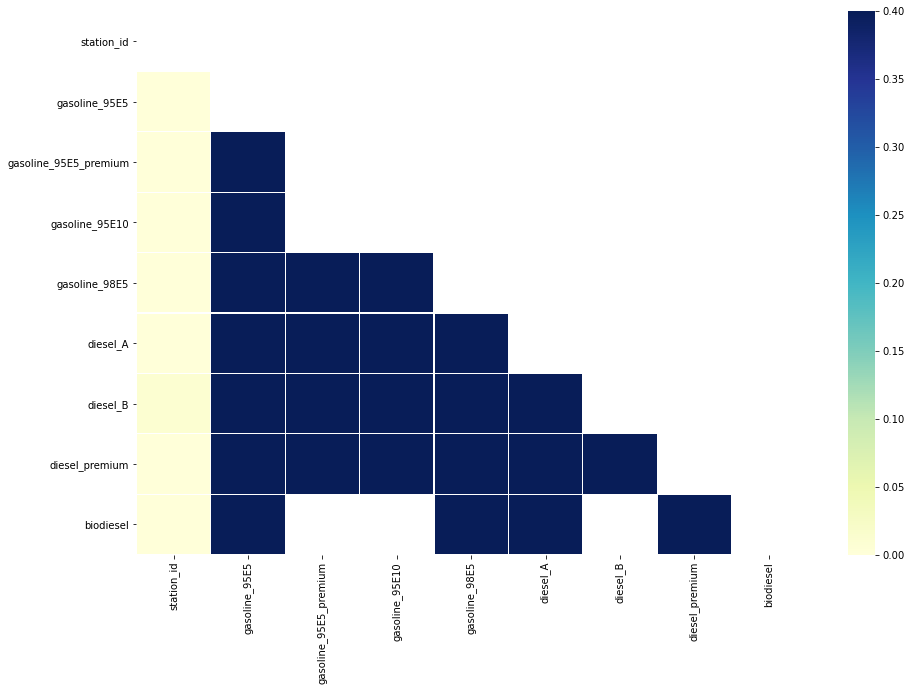

In [433]:
# Calcular las correlaciones
corr = df_gasoline2022.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmin = 0,
            vmax=.4,
            mask=mask,
            linewidths=.2, cmap="YlGnBu")

> Se puede observar que:
- La mayoría de los carburantes mantienen una fuerte correlación entre ellos.
- El dato <i>station_id</i> no mantiene una relación fuerte con ninguno de los carburantes.

### Representación de gráficas

Para las gráficas se mostrará la media de precio de cada carburante durante el año 2022 en Madrid, para a continuación realizar una comparativa de éstos.

#### Media de cada carburante por mes

In [74]:
df_gasoline2022_gasoline_95E5=df_gasoline2022[['date','gasoline_95E5']]
df_gasoline2022_gasoline_95E5_premium=df_gasoline2022[['date','gasoline_95E5_premium']]
df_gasoline2022_gasoline_95E10=df_gasoline2022[['date','gasoline_95E10']]
df_gasoline2022_gasoline_98E5=df_gasoline2022[['date','gasoline_98E5']]
df_gasoline2022_diesel_A=df_gasoline2022[['date','diesel_A']]
df_gasoline2022_diesel_B=df_gasoline2022[['date','diesel_B']]
df_gasoline2022_diesel_premium=df_gasoline2022[['date','diesel_premium']]
df_gasoline2022_biodiesel=df_gasoline2022[['date','biodiesel']]

In [75]:
df_carburantes=[df_gasoline2022_gasoline_95E5,df_gasoline2022_gasoline_95E5_premium,df_gasoline2022_gasoline_95E10,df_gasoline2022_gasoline_98E5,df_gasoline2022_diesel_A,df_gasoline2022_diesel_B,df_gasoline2022_diesel_premium,df_gasoline2022_biodiesel]

#### Funcion que recibe como parametro un dataframe de un carburante y dibuja la grafica con las medias por mes (no es necesaria)

In [76]:
def grafica_media_mes(df_mes):
    
    df_mes['date']=pd.to_datetime(df_mes['date'])
    df_mes=df_mes.groupby(pd.Grouper(key="date", freq="1M")).mean()
    df_mes = df_mes.reset_index()
    df_mes=df_mes.replace({"2022-01-31":'Enero',"2022-02-28":'Febrero',"2022-03-31":'Marzo',"2022-04-30":'Abril',"2022-05-31":'Mayo',"2022-06-30":'Junio',"2022-07-31":'Julio',"2022-08-31":'Agosto', "2022-09-30":'Septiembre',"2022-10-31":'Octubre',"2022-11-30":'Noviembre',"2022-12-31":'Diciembre'})
    
    tipo_carburante=df_mes.columns[1]
    
    
    x = df_mes.date.values
    y = df_mes[tipo_carburante].values

    f, ax = plt.subplots(nrows=4, ncols=2,figsize=(8,8))
    plt.bar(x,y,color='0.9', edgecolor='blue', width=0.5)
    
    

    plt.ylim(0,2.5)
    plt.title("Media por mes Gasoline_95E5",fontsize=15)
    plt.xlabel("Carburante",fontsize=15)
    plt.ylabel("Euro/litro",fontsize=15)
    plt.yticks(fontsize=11)
    plt.xticks(fontsize=11)
    plt.show()


#### Funcion para filtrar los dataframe de los carburantes y filtrar por fechas

In [77]:
def filtrar_df(df_carburantes):
    nuevo_df_carburantes=[]
    for df_mes in df_carburantes:
        df_mes['date']=pd.to_datetime(df_mes['date'])
        df_mes=df_mes.groupby(pd.Grouper(key="date", freq="1M")).mean()
        df_mes = df_mes.reset_index()
        df_mes=df_mes.replace({"2022-01-31":'Enero',"2022-02-28":'Febrero',"2022-03-31":'Marzo',"2022-04-30":'Abril',"2022-05-31":'Mayo',"2022-06-30":'Junio',"2022-07-31":'Julio',"2022-08-31":'Agosto', "2022-09-30":'Septiembre',"2022-10-31":'Octubre',"2022-11-30":'Noviembre',"2022-12-31":'Diciembre'})
        nuevo_df_carburantes.append(df_mes)
        
    return nuevo_df_carburantes

In [78]:
nuevo_df_carburantes=filtrar_df(df_carburantes)

C:\Users\pue\AppData\Local\Temp/ipykernel_6092/3803190939.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes['date']=pd.to_datetime(df_mes['date'])
C:\Users\pue\AppData\Local\Temp/ipykernel_6092/3803190939.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mes['date']=pd.to_datetime(df_mes['date'])
C:\Users\pue\AppData\Local\Temp/ipykernel_6092/3803190939.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

##### Graficas de cada carburante con la media por mes

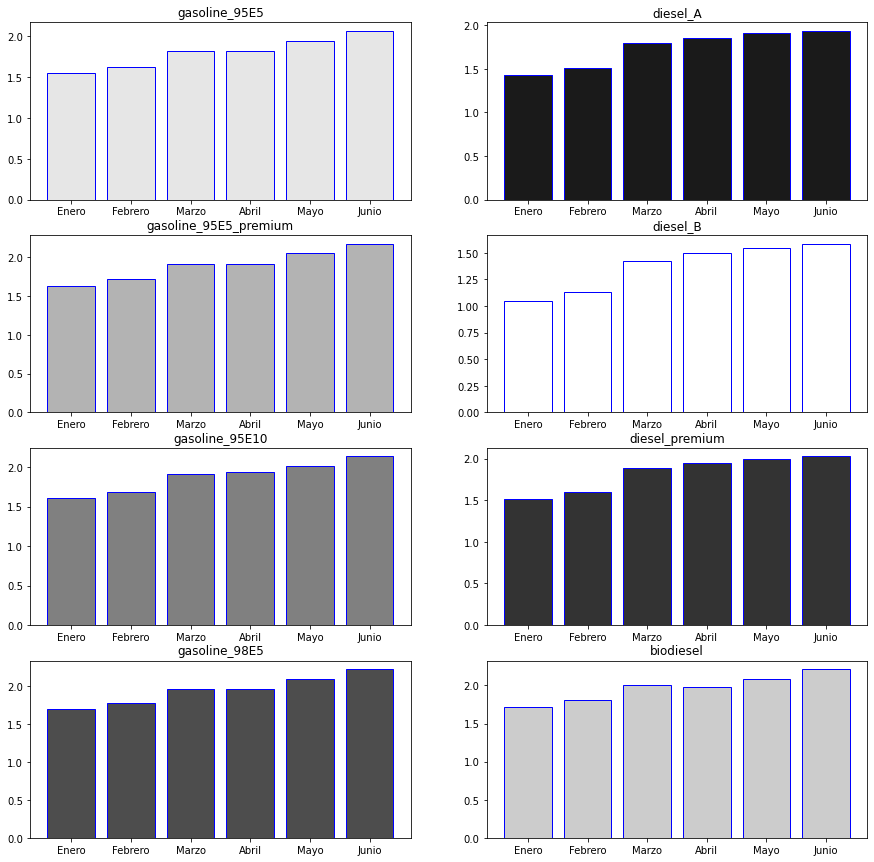

In [79]:
tipo_carburante_1=nuevo_df_carburantes[0].columns[1] 
tipo_carburante_2=nuevo_df_carburantes[1].columns[1]    
tipo_carburante_3=nuevo_df_carburantes[2].columns[1]    
tipo_carburante_4=nuevo_df_carburantes[3].columns[1]    
tipo_carburante_5=nuevo_df_carburantes[4].columns[1]    
tipo_carburante_6=nuevo_df_carburantes[5].columns[1]    
tipo_carburante_7=nuevo_df_carburantes[6].columns[1]    
tipo_carburante_8=nuevo_df_carburantes[7].columns[1]    


x1 = nuevo_df_carburantes[0].date.values
y1= nuevo_df_carburantes[0][tipo_carburante_1].values

x2= nuevo_df_carburantes[1].date.values
y2= nuevo_df_carburantes[1][tipo_carburante_2].values

x3= nuevo_df_carburantes[2].date.values
y3= nuevo_df_carburantes[2][tipo_carburante_3].values

x4= nuevo_df_carburantes[3].date.values
y4= nuevo_df_carburantes[3][tipo_carburante_4].values

x5= nuevo_df_carburantes[4].date.values
y5= nuevo_df_carburantes[4][tipo_carburante_5].values

x6= nuevo_df_carburantes[5].date.values
y6= nuevo_df_carburantes[5][tipo_carburante_6].values

x7= nuevo_df_carburantes[6].date.values
y7= nuevo_df_carburantes[6][tipo_carburante_7].values

x8= nuevo_df_carburantes[7].date.values
y8= nuevo_df_carburantes[7][tipo_carburante_8].values


f, ax = plt.subplots(nrows=4, ncols=2,figsize=(15,15))

ax[0][0].bar(x1,y1,color='0.9', edgecolor='blue')
ax[0][0].set_title(tipo_carburante_1)


ax[1][0].bar(x2,y2, color='0.7', edgecolor='blue')
ax[1][0].set_title(tipo_carburante_2)

ax[2][0].bar(x3,y3, color='0.5', edgecolor='blue')
ax[2][0].set_title(tipo_carburante_3)

ax[3][0].bar(x4,y4 , color='0.3', edgecolor='blue')
ax[3][0].set_title(tipo_carburante_4)

ax[0][1].bar(x5,y5, color='0.1', edgecolor='blue')
ax[0][1].set_title(tipo_carburante_5)

ax[1][1].bar(x6,y6, color='1', edgecolor='blue')
ax[1][1].set_title(tipo_carburante_6)

ax[2][1].bar(x7,y7, color='0.2', edgecolor='blue')
ax[2][1].set_title(tipo_carburante_7)

ax[3][1].bar(x8,y8, color='0.8', edgecolor='blue')
ax[3][1].set_title(tipo_carburante_8)


plt.show()

#### Media carburante por año

In [80]:
df_gasolina = pd.concat( [df_gasoline_00_v1, df_gasoline_01_v1, df_gasoline_02_v1, df_gasoline_03_v1, df_gasoline_04_v1, df_gasoline_05_v1, df_gasoline_06_v1, df_gasoline_07_v1, df_gasoline_08_v1, df_gasoline_09_v1, df_gasoline_10_v1, df_gasoline_11_v1, df_gasoline_12_v1, df_gasoline_13_v1, df_gasoline_14_v1, df_gasoline_16_v1, df_madrid2022_16], ignore_index=True )

In [81]:
#Filtramos por años
df_gasolina_2022 = df_gasolina[df_gasolina["date"].str.contains("2022")]
df_gasolina_2021 = df_gasolina[df_gasolina["date"].str.contains("2021")]
df_gasolina_2020 = df_gasolina[df_gasolina["date"].str.contains("2020")]
df_gasolina_2019 = df_gasolina[df_gasolina["date"].str.contains("2019")]
df_gasolina_2018 = df_gasolina[df_gasolina["date"].str.contains("2018")]
df_gasolina_2017 = df_gasolina[df_gasolina["date"].str.contains("2017")]
df_gasolina_2016 = df_gasolina[df_gasolina["date"].str.contains("2016")]
df_gasolina_2015 = df_gasolina[df_gasolina["date"].str.contains("2015")]
df_gasolina_2014 = df_gasolina[df_gasolina["date"].str.contains("2014")]
df_gasolina_2013 = df_gasolina[df_gasolina["date"].str.contains("2013")]
df_gasolina_2012 = df_gasolina[df_gasolina["date"].str.contains("2012")]
df_gasolina_2011 = df_gasolina[df_gasolina["date"].str.contains("2011")]
df_gasolina_2010 = df_gasolina[df_gasolina["date"].str.contains("2010")]
df_gasolina_2009 = df_gasolina[df_gasolina["date"].str.contains("2009")]
#df_gasolina_2008 = df_gasolina[df_gasolina["date"].str.contains("2008")]
#df_gasolina_2007 = df_gasolina[df_gasolina["date"].str.contains("2007")]


In [84]:
# Eliminar columnas que no necesitamos
df_gasolina_2022=df_gasolina_2022.describe().drop(['station_id',"gasoline_98E10", "bioetanol", "hydrogen"], axis=1)
df_gasolina_2021=df_gasolina_2021.describe().drop(['station_id',"gasoline_98E10", "bioetanol", "hydrogen"], axis=1)
df_gasolina_2020=df_gasolina_2020.describe().drop(['station_id',"gasoline_98E10", "bioetanol", "hydrogen"], axis=1)
df_gasolina_2019=df_gasolina_2019.describe().drop(['station_id','gasoline_95E5_premium','gasoline_95E10',"gasoline_98E10", "bioetanol", "hydrogen"], axis=1)
df_gasolina_2018=df_gasolina_2018.describe().drop(['station_id','gasoline_95E5_premium','gasoline_95E10',"gasoline_98E10", "bioetanol", "hydrogen"], axis=1)
df_gasolina_2017=df_gasolina_2017.describe().drop(['station_id','gasoline_95E5_premium','gasoline_95E10',"gasoline_98E10", "bioetanol", "hydrogen"], axis=1)
df_gasolina_2016=df_gasolina_2016.describe().drop(['station_id','gasoline_95E5_premium','gasoline_95E10',"gasoline_98E10", "bioetanol", "hydrogen"], axis=1)
df_gasolina_2015=df_gasolina_2015.describe().drop(['station_id','gasoline_95E5_premium','gasoline_95E10',"gasoline_98E10", "bioetanol", "hydrogen"], axis=1)
df_gasolina_2014=df_gasolina_2014.describe().drop(['station_id','gasoline_95E5_premium','gasoline_95E10',"gasoline_98E10", "bioetanol", "hydrogen"], axis=1)
df_gasolina_2013=df_gasolina_2013.describe().drop(['station_id','gasoline_95E5_premium','gasoline_95E10',"gasoline_98E10", "bioetanol", "hydrogen"], axis=1)
df_gasolina_2012=df_gasolina_2012.describe().drop(['station_id','gasoline_95E5_premium','gasoline_95E10',"gasoline_98E10", "bioetanol", "hydrogen"], axis=1)
df_gasolina_2011=df_gasolina_2011.describe().drop(['station_id','gasoline_95E5_premium','gasoline_95E10',"gasoline_98E10", "bioetanol", "hydrogen"], axis=1)
df_gasolina_2010=df_gasolina_2010.describe().drop(['station_id','gasoline_95E5_premium','gasoline_95E10',"gasoline_98E10", "bioetanol", "hydrogen"], axis=1)
df_gasolina_2009=df_gasolina_2009.describe().drop(['station_id','gasoline_95E5_premium','gasoline_95E10',"gasoline_98E10", "bioetanol", "hydrogen"], axis=1)
#df_gasolina_2008=df_gasolina_2008.describe().drop(['station_id',"gasoline_98E10", "bioetanol", "hydrogen"], axis=1)
#df_gasolina_2007=df_gasolina_2007.describe().drop(['station_id',"gasoline_98E10", "bioetanol", "hydrogen"], axis=1)

In [85]:
# Eliminar filas que no necesitamos
df_gasolina_2022= df_gasolina_2022.drop(['count', 'std', 'min', 'max', '25%', '50%', '75%'],axis=0)
df_gasolina_2021= df_gasolina_2021.drop(['count', 'std', 'min', 'max', '25%', '50%', '75%'],axis=0)
df_gasolina_2020= df_gasolina_2020.drop(['count', 'std', 'min', 'max', '25%', '50%', '75%'],axis=0)
df_gasolina_2019= df_gasolina_2019.drop(['count', 'std', 'min', 'max', '25%', '50%', '75%'],axis=0)
df_gasolina_2018= df_gasolina_2018.drop(['count', 'std', 'min', 'max', '25%', '50%', '75%'],axis=0)
df_gasolina_2017= df_gasolina_2017.drop(['count', 'std', 'min', 'max', '25%', '50%', '75%'],axis=0)
df_gasolina_2016= df_gasolina_2016.drop(['count', 'std', 'min', 'max', '25%', '50%', '75%'],axis=0)
df_gasolina_2015= df_gasolina_2015.drop(['count', 'std', 'min', 'max', '25%', '50%', '75%'],axis=0)
df_gasolina_2014= df_gasolina_2014.drop(['count', 'std', 'min', 'max', '25%', '50%', '75%'],axis=0)
df_gasolina_2013= df_gasolina_2013.drop(['count', 'std', 'min', 'max', '25%', '50%', '75%'],axis=0)
df_gasolina_2012= df_gasolina_2012.drop(['count', 'std', 'min', 'max', '25%', '50%', '75%'],axis=0)
df_gasolina_2011= df_gasolina_2011.drop(['count', 'std', 'min', 'max', '25%', '50%', '75%'],axis=0)
df_gasolina_2010= df_gasolina_2010.drop(['count', 'std', 'min', 'max', '25%', '50%', '75%'],axis=0)
df_gasolina_2009= df_gasolina_2009.drop(['count', 'std', 'min', 'max', '25%', '50%', '75%'],axis=0)
#df_gasolina_2008= df_gasolina_2008.drop(['count', 'std', 'min', 'max', '25%', '50%', '75%'],axis=0)
#df_gasolina_2007= df_gasolina_2008.drop(['count', 'std', 'min', 'max', '25%', '50%', '75%'],axis=0)

In [93]:
df_gasolina_2021

,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,diesel_A,diesel_B,diesel_premium,biodiesel
mean,1.37303,1.471567,1.41894,1.516184,1.241687,0.86499,1.333428,1.22984


In [91]:
columnas = df_gasolina_2021.columns
valores = df_gasolina_2021.values[0]

In [97]:
for i in range (0,len(columnas)):
    print(str(columnas[i]) + ': ' + str(valores[i]))


gasoline_95E5: 1.3730301179029154
gasoline_95E5_premium: 1.4715674014431936
gasoline_95E10: 1.4189398885350326
gasoline_98E5: 1.516183956441436
diesel_A: 1.2416870419015336
diesel_B: 0.8649904835446189
diesel_premium: 1.333428357646491
biodiesel: 1.2298398676992577


In [100]:
def grafica_media_anual(df_carburante_anual):
    
    #Mostrar precios medios anuales de cada carburante
    columnas = df_gasolina_2021.columns
    valores = df_gasolina_2021.values[0]
    
    for i in range (0,len(columnas)):
        print(str(columnas[i]) + ': ' + str(valores[i]))
        
        
    
    y=df_carburante_anual.columns
    x=df_carburante_anual.values[0]

    colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85","#007BDC"]

    plt.figure(figsize=[14,12])
    plt.style.use("ggplot")
    plt.pie(x, labels=y,autopct="%0.2f %%", colors=colores)
    plt.axis('equal')
    plt.legend(loc='upper right')
    plt.text(1.5, 0.55, 'Texto en Matpldaedadaededadeetlib \ndaedda',
        fontsize=18)
    plt.show

gasoline_95E5: 1.3730301179029154
gasoline_95E5_premium: 1.4715674014431936
gasoline_95E10: 1.4189398885350326
gasoline_98E5: 1.516183956441436
diesel_A: 1.2416870419015336
diesel_B: 0.8649904835446189
diesel_premium: 1.333428357646491
biodiesel: 1.2298398676992577


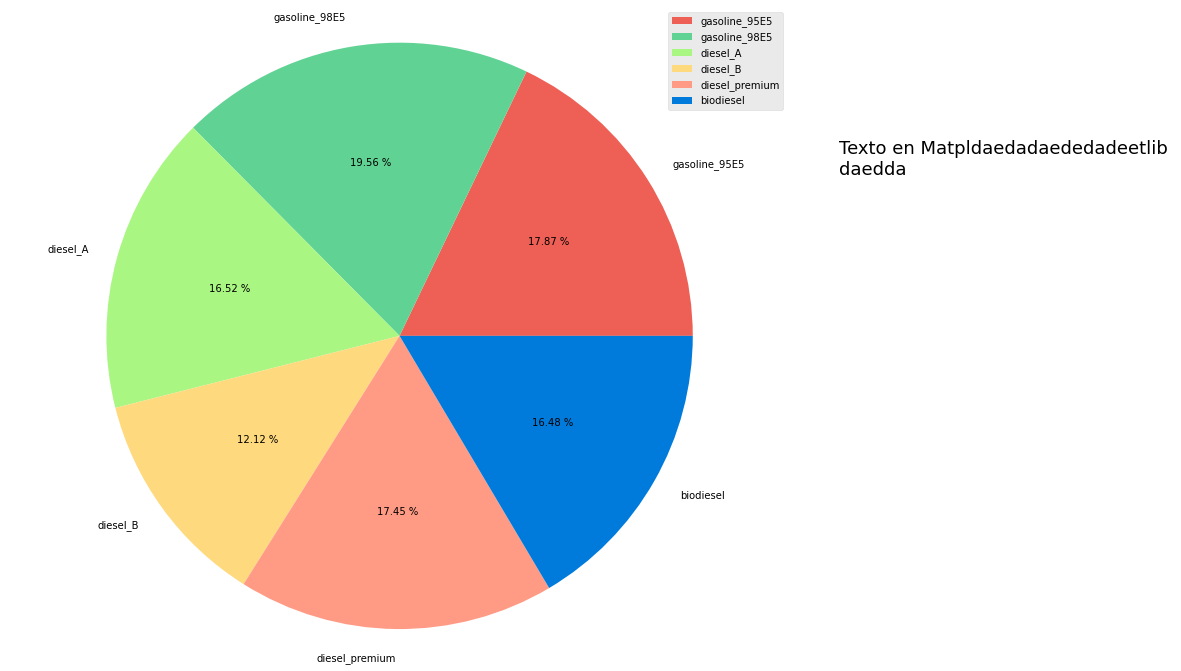

In [102]:
#Ejemplo gráfica 2010
grafica_media_anual(df_gasolina_2010)

Una vez obtenidas las gráficas para examinar los datos de una manera más visual, se pasará a entrenar los modelos para conseguir predicciones sobre el precio de la gasolina.

## Algoritmos y predicciones

Para ello antes de mostrar los algoritmos que se van a utilizar, se va a modificar la tabla, para que la columna "<i>date</i>" que tiene un formato <i>XXXX-MM-DD</i> tenga tres columnas para la fecha.

In [434]:
# Se crea una tabla con sola la columna "date"
df_gasoline2022_fechas = df_gasoline2022["date"].dropna()

# Se crean los arrays
years = []
months = []
days = []

# Se recorre la tabla
for k in df_gasoline2022_fechas:
    # Se guarda como string unico todo aquello separado por un "-"
    year, month, day = k.split('-')
    # Se insertan en los arrays
    years.append(int(year))
    months.append(int(month))
    days.append(int(day))

# Se actualiza la tabla con las 3 columnas nuevas
df_gasoline2022 = pd.DataFrame(zip(df_gasoline2022["station_id"], df_gasoline2022["region_name"], df_gasoline2022["municipality_name"], years, months, days, df_gasoline2022["gasoline_95E5"], df_gasoline2022["gasoline_95E5_premium"], df_gasoline2022["gasoline_95E10"], df_gasoline2022["gasoline_98E5"], df_gasoline2022["diesel_A"], df_gasoline2022["diesel_B"], df_gasoline2022["diesel_premium"], df_gasoline2022["biodiesel"]), columns=['station_id', 'region_name', 'municipality_name', 'year', 'month', 'day', 'gasoline_95E5', 'gasoline_95E5_premium', 'gasoline_95E10', 'gasoline_98E5', 'diesel_A', 'diesel_B', 'diesel_premium', 'biodiesel'])

In [435]:
# Se sustituyen todos los valores NaN por 0
df_gasoline2022 = df_gasoline2022.fillna(0)

In [436]:
df_gasoline2022

,station_id,region_name,municipality_name,year,month,day,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,diesel_A,diesel_B,diesel_premium,biodiesel
0,4312,Madrid,Madrid,2022,6,3,2.169,2.229,0.0,0.000,2.005,0.0,2.085,0.0
1,3201,Madrid,Madrid,2022,6,1,2.099,0.000,0.0,2.269,1.959,0.0,2.049,0.0
2,3222,Madrid,Torrejón de la Calzada,2022,3,4,1.739,1.799,0.0,0.000,1.655,0.0,1.735,0.0
3,4600,Madrid,Madrid,2022,3,25,1.889,0.000,0.0,2.029,1.919,0.0,1.999,0.0
4,4364,Madrid,Navacerrada,2022,2,25,1.664,1.744,0.0,1.796,1.549,0.0,1.629,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95720,13893,Madrid,Madrid,2022,1,2,1.459,0.000,0.0,0.000,1.299,0.0,1.339,0.0
95721,14513,Madrid,Alcobendas,2022,1,24,1.459,0.000,0.0,0.000,1.339,0.0,1.359,0.0
95722,11918,Madrid,Alcobendas,2022,1,7,1.459,0.000,0.0,1.649,1.329,0.0,1.359,0.0
95723,14070,Madrid,Tres Cantos,2022,1,18,1.359,0.000,0.0,0.000,1.229,0.0,0.000,0.0


Se va a volver a examinar las correlaciones entre las diferentes columnas.

<AxesSubplot:>

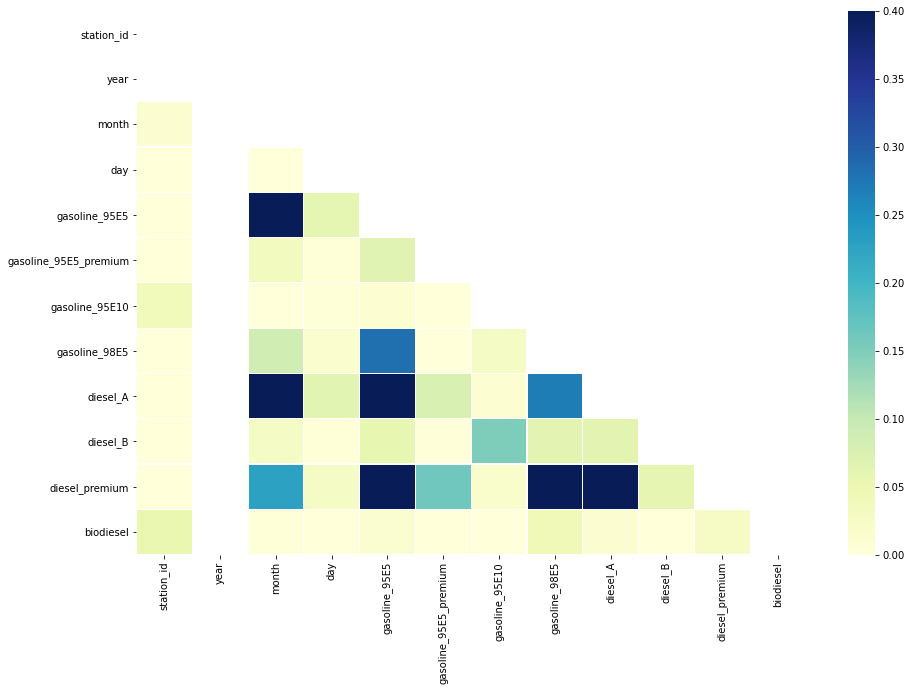

In [437]:
# Calcular las correlaciones
corr = df_gasoline2022.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmin=0,
            vmax=.4,
            mask=mask,
            linewidths=.2, cmap="YlGnBu")

Una vez terminado con esto, se puede comenzar a entrenar el modelo.

Se van a probar diferentes algoritmos para predecir los 8 diferentes carburantes de los que se disponen.

## Regresión Logística

Es una técnica de análisis de datos que utiliza las matemáticas para encontrar las relaciones entre dos factores de datos. Luego, utiliza esta relación para predecir el valor de uno de esos factores basándose en el otro.

Para este caso se utilizará este algoritmo para predecir los carburantes: <br>
<ul>
    <li> gasoline_95E5</li>
    <li> gasoline_95E5_premium</li>
        
</ul>

### <center><u>gasoline_95E5</u></center>

In [438]:
df_log1 = df_gasoline2022

Para trabajar con los datos en un rango estblecido, se hace uso de <b>MinMaxScaler</b> que transforma los datos escalando cada característica a un rango determinado.

In [439]:
# Se establece un rango
scaler = MinMaxScaler(feature_range=(0, 2.2))
# Se modifican las columnas seleccionadas
df_norm = df_log1[["day", "gasoline_95E5"]]
for col in df_norm:
    df_log1[[col]]=scaler.fit_transform(df_log1[[col]])
    
df_log1.head()

,station_id,region_name,municipality_name,year,month,day,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,diesel_A,diesel_B,diesel_premium,biodiesel
0,4312,Madrid,Madrid,2022,6,0.146667,2.169986,2.229,0.0,0.000,2.005,0.0,2.085,0.0
1,3201,Madrid,Madrid,2022,6,0.000000,2.099955,0.000,0.0,2.269,1.959,0.0,2.049,0.0
2,3222,Madrid,Torrejón de la Calzada,2022,3,0.220000,1.739791,1.799,0.0,0.000,1.655,0.0,1.735,0.0
3,4600,Madrid,Madrid,2022,3,1.760000,1.889859,0.000,0.0,2.029,1.919,0.0,1.999,0.0
4,4364,Madrid,Navacerrada,2022,2,1.760000,1.664757,1.744,0.0,1.796,1.549,0.0,1.629,0.0


In [440]:
# Se establecen las variables para el entrenamiento
Y = df_log1["day"] < 1.1
X = df_log1[["gasoline_95E5"]]

In [441]:
# Se crea el modelo con LogisticRegression()
logreg = LogisticRegression()
# Se entrena el modelo
logreg.fit(X, Y)
# Se obtienen las predicciones
Y_pred = logreg.predict(X)

In [442]:
np.round(logreg.predict_proba(X),3)

array([[0.532, 0.468],
       [0.527, 0.473],
       [0.498, 0.502],
       ...,
       [0.476, 0.524],
       [0.468, 0.532],
       [0.47 , 0.53 ]])

In [443]:
# El 52.29% de las predicciones han sido correctas
np.mean(Y_pred == Y)

0.5298197962914599

In [444]:
# En el caso real hay una aproximación del 50.26%
np.mean(Y)

0.5026795507965526

In [445]:
# Se imprime la matriz de confusion
confusion_matrix = metrics.confusion_matrix(Y, Y_pred)
print(confusion_matrix)

[[28057 19549]
 [25459 22660]]


Para visualizar mejor los datos acertados, se mostrará en un mapa de calor.

Text(33.0, 0.5, 'Realidad')

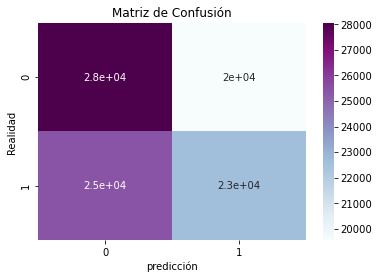

In [446]:
f,ax=plt.subplots()


sns.heatmap(confusion_matrix, annot=True, ax=ax, cmap="BuPu")

ax.set_title('Matriz de Confusión') #título
ax.set_xlabel('predicción') #eje x
ax.set_ylabel('Realidad') #eje y

### Resultados

> Se puede observar que: 
- Un 2.8e+04 de los datos eran False y el modelo los ha predicho correctamente (0,0)
- Un 2.3e+04 de los datos eran True y el modelo los ha predicho correctamente (1,1)
- Un 2.5e+04 de los datos eran True pero el modelo los ha predicho como False (1,0)
- Un 2e+04 de los datos eran False pero el modelo los ha predicho como True (0,1)

### <center><u>gasoline_95E5_premium</u></center>

In [580]:
df_log2 = df_gasoline2022

In [581]:
# Se establece un rango
scaler = MinMaxScaler(feature_range=(0, 2.4))
# Se modifican las columnas seleccionadas
df_norm = df_log2[["day", "gasoline_95E5_premium"]]
for col in df_norm:
    df_log2[[col]]=scaler.fit_transform(df_log2[[col]])
    
df_log2.head()

,station_id,region_name,municipality_name,year,month,day,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,diesel_A,diesel_B,diesel_premium,biodiesel
0,4312,Madrid,Madrid,0.0,2.40,0.16,2.169986,2.347345,0.0,0.000000,2.005,0.0,2.120964,0.0
1,3201,Madrid,Madrid,0.0,2.40,0.00,2.099955,0.000000,0.0,2.260523,1.959,0.0,2.084343,0.0
2,3222,Madrid,Torrejón de la Calzada,0.0,0.96,0.24,1.739791,1.894515,0.0,0.000000,1.655,0.0,1.764927,0.0
3,4600,Madrid,Madrid,0.0,0.96,1.92,1.889859,0.000000,0.0,2.021420,1.919,0.0,2.033481,0.0
4,4364,Madrid,Navacerrada,0.0,0.48,1.92,1.664757,1.836595,0.0,1.789290,1.549,0.0,1.657099,0.0


In [582]:
# Se establecen las variables para el entrenamiento
Y = df_log2["day"] < 1.2
X = df_log2[["gasoline_95E5_premium"]]

In [583]:
# Se crea el modelo con LogisticRegression()
logreg = LogisticRegression()
# Se entrena el modelo
logreg.fit(X, Y)
# Se obtienen las predicciones
Y_pred = logreg.predict(X)

In [584]:
np.round(logreg.predict_proba(X),3)

array([[0.504, 0.496],
       [0.497, 0.503],
       [0.502, 0.498],
       ...,
       [0.497, 0.503],
       [0.497, 0.503],
       [0.497, 0.503]])

In [585]:
# El 50.21% de las predicciones han sido correctas
np.mean(Y_pred == Y)

0.5021154348393837

In [586]:
# En el caso real hay una aproximación del 50.26%
np.mean(Y)

0.5026795507965526

In [587]:
# Se imprime la matriz de confusion
confusion_matrix = metrics.confusion_matrix(Y, Y_pred)
print(confusion_matrix)

[[ 5128 42478]
 [ 5182 42937]]


Text(33.0, 0.5, 'Realidad')

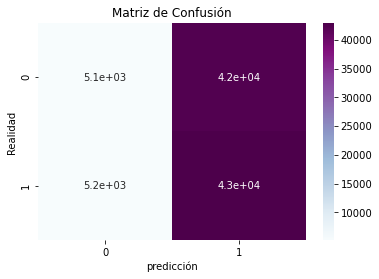

In [590]:
f,ax=plt.subplots()


sns.heatmap(confusion_matrix, annot=True, ax=ax, cmap="BuPu")

ax.set_title('Matriz de Confusión') #título
ax.set_xlabel('predicción') #eje x
ax.set_ylabel('Realidad') #eje y

### Resultados

> Se puede observar que: 
- Un 5.1e+03 de los datos eran False y el modelo los ha predicho correctamente (0,0)
- Un 4.3e+04 de los datos eran True y el modelo los ha predicho correctamente (1,1)
- Un 5.2e+03 de los datos eran True pero el modelo los ha predicho como False (1,0)
- Un 4.2e+04 de los datos eran False pero el modelo los ha predicho como True (0,1)

## Random forest

Es una combinación de árboles predictores tal que cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno de estos.

Para este algoritmo se observarán los siguientes carburantes:
<ul>
    <li>gasoline_95E10</li>
    <li>gasoline_98E5</li>
</ul>

### <center><u>gasoline_95E10</u></center>

In [456]:
df_rf1 = df_gasoline2022.dropna(subset = ["gasoline_95E10"])

In [457]:
# Se establece un rango
scaler = MinMaxScaler(feature_range=(0, 2.2))
# Se modifican las columnas seleccionadas
df_norm = df_rf1[["year", "month", "day", "gasoline_95E5_premium"]]
for col in df_norm:
    df_rf1[[col]]=scaler.fit_transform(df_rf1[[col]])
    
df_rf1.head()

,station_id,region_name,municipality_name,year,month,day,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,diesel_A,diesel_B,diesel_premium,biodiesel
0,4312,Madrid,Madrid,0.0,2.20,0.146667,2.169986,2.151733,0.0,0.000,2.005,0.0,2.085,0.0
1,3201,Madrid,Madrid,0.0,2.20,0.000000,2.099955,0.000000,0.0,2.269,1.959,0.0,2.049,0.0
2,3222,Madrid,Torrejón de la Calzada,0.0,0.88,0.220000,1.739791,1.736639,0.0,0.000,1.655,0.0,1.735,0.0
3,4600,Madrid,Madrid,0.0,0.88,1.760000,1.889859,0.000000,0.0,2.029,1.919,0.0,1.999,0.0
4,4364,Madrid,Navacerrada,0.0,0.44,1.760000,1.664757,1.683545,0.0,1.796,1.549,0.0,1.629,0.0


In [458]:
# Se reservan 1000 datos para el test
dftest = df_rf1.tail(1000)
df = df_rf1.head(100000)

In [459]:
# Se crea el modelo con tree del tipo DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()

X = df[["year", "month", "day", "gasoline_95E10"]]
X_test = dftest[["year", "month", "day", "gasoline_95E10"]]
Y = df["gasoline_95E5"] > 1.1

Y_test = dftest["gasoline_95E5"] > 1.1

# Se entrena el modelo
clf = clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

In [460]:
# Hay un 72.5% de precisión entre la fase de test y la fase de prediccion
np.mean(Y_test == Y_pred_test)

0.725

In [461]:
# Se generan 100 árboles
clf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

# Clasificamos las variables con mayor importancia, el retraso de salida DepDelay es el más aproximado.
clf.feature_importances_

array([0.        , 0.21126726, 0.77663542, 0.01209731])

In [462]:
# Hay un 72.5% de precisión entre la fase de test y la fase de prediccion
np.mean(Y_test == Y_pred_test)

0.725

In [463]:
# Se imprime la matriz de confusión
confusion_matrix = metrics.confusion_matrix(Y, Y_pred)
print(confusion_matrix)

[[  154  2365]
 [10156 83050]]


Text(33.0, 0.5, 'Realidad')

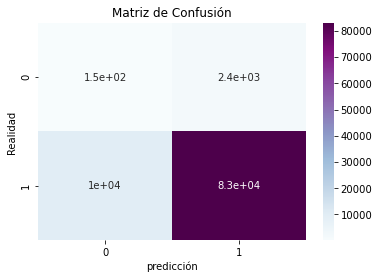

In [465]:
f,ax=plt.subplots()

sns.heatmap(confusion_matrix, annot=True, ax=ax, cmap="BuPu") #Dibuja un mapa de calor

ax.set_title('Matriz de Confusión') #título
ax.set_xlabel('predicción') #eje x
ax.set_ylabel('Realidad') #eje y

### Resultados

> Se puede observar que: 
- Un 1.5e+02 de lso datos eran False y el modelo lps ha predicho correctamente (0,0)
- Un 8.3e+04 de los datos eran True y el modelo los ha predicho correctamente (1,1)
- Un 1e+04 de los datos eran True pero el modelo los ha predicho como False (1,0)
- Un 2.4e+03 de los datos eran False pero el modelo los ha predicho como True (0,1)

### <center><u>gasoline_98E5</u></center>

In [466]:
df_rf2 = df_gasoline2022

In [467]:
# Se establece un rango
scaler = MinMaxScaler(feature_range=(0, 2.4))
# Se modifican las columnas seleccionadas
df_norm = df_rf2[["year", "month", "day", "gasoline_98E5"]]
for col in df_norm:
    df_rf2[[col]]=scaler.fit_transform(df_rf2[[col]])
    
df_rf2.head()

,station_id,region_name,municipality_name,year,month,day,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,diesel_A,diesel_B,diesel_premium,biodiesel
0,4312,Madrid,Madrid,0.0,2.40,0.16,2.169986,2.347345,0.0,0.000000,2.005,0.0,2.085,0.0
1,3201,Madrid,Madrid,0.0,2.40,0.00,2.099955,0.000000,0.0,2.260523,1.959,0.0,2.049,0.0
2,3222,Madrid,Torrejón de la Calzada,0.0,0.96,0.24,1.739791,1.894515,0.0,0.000000,1.655,0.0,1.735,0.0
3,4600,Madrid,Madrid,0.0,0.96,1.92,1.889859,0.000000,0.0,2.021420,1.919,0.0,1.999,0.0
4,4364,Madrid,Navacerrada,0.0,0.48,1.92,1.664757,1.836595,0.0,1.789290,1.549,0.0,1.629,0.0


In [468]:
# Se reservan 1000 datos para el test
dftest = df_rf2.tail(1000)
df = df_rf2.head(100000)

In [469]:
# Se crea el modelo con tree del tipo DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()

X = df[["year", "month", "day", "gasoline_98E5"]]
X_test = dftest[["year", "month", "day", "gasoline_98E5"]]
Y = df["gasoline_98E5"] > 1.2

Y_test = dftest["gasoline_98E5"] > 1.2

# Se entrena el modelo
clf = clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

In [470]:
# Hay un 100% de precisión entre la fase de test y la fase de prediccion
np.mean(Y_test == Y_pred_test)

1.0

In [471]:
# Se generan 100 árboles
clf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
clf.fit(X, Y)
Y_pred_test = clf.predict(X_test)

# Clasificamos las variables con mayor importancia, el retraso de salida DepDelay es el más aproximado.
clf.feature_importances_

array([0.00000000e+00, 1.64961448e-04, 6.11179897e-05, 9.99773921e-01])

In [472]:
# Hay un 100% de precisión entre la fase de test y la fase de prediccion
np.mean(Y_test == Y_pred_test)

1.0

In [473]:
# Se imprime la matriz de confusión
confusion_matrix = metrics.confusion_matrix(Y, Y_pred)
print(confusion_matrix)

[[ 6726 28250]
 [ 3584 57165]]


Text(33.0, 0.5, 'Realidad')

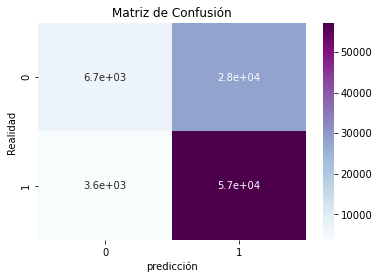

In [474]:
f,ax=plt.subplots()

sns.heatmap(confusion_matrix, annot=True, ax=ax, cmap="BuPu") #Dibuja un mapa de calor

ax.set_title('Matriz de Confusión') #título
ax.set_xlabel('predicción') #eje x
ax.set_ylabel('Realidad') #eje y

### Resultados

> Se puede observar que: 
- Un 6.7e+04 de los datos eran False y el modelo los ha predicho correctamente (0,0)
- Un 5.7e+04 de los datos eran True y el modelo los ha predicho correctamente (1,1)
- Un 3.6e+04 de los datos eran True pero el modelo los ha predicho como False (1,0)
- Un 2.8e+04 de los datos eran False pero el modelo los ha predicho como True (0,1)

## K-NN

El método de los k vecinos más cercanos es un método de clasificación supervisada  que estima el valor de la función de densidad de probabilidad o directamente la probabilidad a posteriori de que un elemento <b>x</b> pertenezca a la clase <b>C</b> a partir de la información proporcionada por el conjunto de prototipos.

Para este caso se van analizar bajo este algoritmo los siguientes carburantes:
<ul>
    <li>diesel_A</li>
    <li>diesel_B</li>
</ul>

### <center><u>diesel_A</u></center>

In [475]:
# Se crea una tabla con la informacion que se desea
df_knn1 = df_gasoline2022[["year", "month", "day", "diesel_A"]].dropna()

In [476]:
# Se establece un rango
scaler = MinMaxScaler(feature_range=(0, 2.2))
# Se modifican las columnas seleccionadas
df_norm = df_knn1[["year", "month", "day", "diesel_A"]]
for col in df_norm:
    df_knn1[[col]]=scaler.fit_transform(df_knn1[[col]])
    
df_knn1.head()

,year,month,day,diesel_A
0,0.0,2.20,0.146667,2.033656
1,0.0,2.20,0.000000,1.986999
2,0.0,0.88,0.220000,1.678654
3,0.0,0.88,1.760000,1.946427
4,0.0,0.44,1.760000,1.571139


In [477]:
# la tabla cols guarda todo menos la columna "diesel_A"
cols = df_knn1[df_knn1.columns[df_knn1.columns != "diesel_A"]]

In [478]:
filtro = df_knn1["diesel_A"] > 1.1 

In [479]:
# Se etiquetan los casos
df_knn1["diesel_A"][filtro] = "CARO"
df_knn1["diesel_A"][filtro == False] = "NO CARO"

In [480]:
# Se crea el modelo K-nn, con un numero de 5 vecinos
nbrs_5 = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)

In [481]:
nbrs_5.fit(cols, df_knn1["diesel_A"])

KNeighborsClassifier(n_jobs=-1)

In [482]:
predicciones_5 = nbrs_5.predict(cols)

In [483]:
# las predicciones coinciden en un 97.59%
np.mean(predicciones_5 == df_knn1["diesel_A"])

0.9759206059023243

In [484]:
# Pero el 2.4% estan clasificados bien
np.mean(df_knn1["diesel_A"] == "NO CARO")

0.024079394097675632

In [485]:
# Se imprime la matriz de confusion
confusion_matrix = metrics.confusion_matrix(df_knn1["diesel_A"], predicciones_5)
print(confusion_matrix)

[[93420     0]
 [ 2305     0]]


Text(33.0, 0.5, 'Realidad')

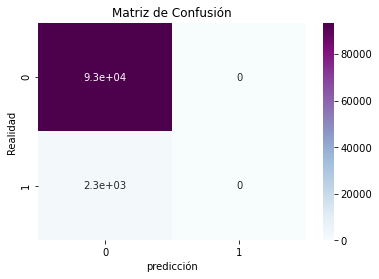

In [486]:
f,ax=plt.subplots()

sns.heatmap(confusion_matrix, annot=True, ax=ax, cmap="BuPu") #Dibuja un mapa de calor

ax.set_title('Matriz de Confusión') #título
ax.set_xlabel('predicción') #eje x
ax.set_ylabel('Realidad') #eje y

### Resultados

> Se puede observar que: 
- Un 9.3e+04 de los datos eran False y el modelo los ha predicho correctamente (0,0)
- Un 2.5e+04 de los datos eran True y el modelo los ha predicho correctamente (1,1)
- Un 3.6e+04 de los datos eran True pero el modelo los ha predicho como False (1,0)
- Un 1.7e+04 de los datos eran False pero el modelo los ha predicho como True (0,1)

### <center><u>diesel_B</u></center>

In [487]:
# Se crea una tabla con la informacion que se desea
df_knn2 = df_gasoline2022[["year", "month", "day", "diesel_B"]].dropna()

In [488]:
# Se establece un rango
scaler = MinMaxScaler(feature_range=(0, 1.7))
# Se modifican las columnas seleccionadas
df_norm = df_knn2[["year", "month", "day", "diesel_B"]]
for col in df_norm:
    df_knn2[[col]]=scaler.fit_transform(df_knn2[[col]])
    
df_knn2.head()

,year,month,day,diesel_B
0,0.0,1.70,0.113333,0.0
1,0.0,1.70,0.000000,0.0
2,0.0,0.68,0.170000,0.0
3,0.0,0.68,1.360000,0.0
4,0.0,0.34,1.360000,0.0


In [489]:
# la tabla cols guarda todo menos la columna "diesel_B"
cols = df_knn2[df_knn2.columns[df_knn2.columns != "diesel_B"]]

In [490]:
filtro = df_knn2["diesel_B"] > 0.85

In [491]:
# Se etiquetan los casos
df_knn2["diesel_B"][filtro] = "CARO"
df_knn2["diesel_B"][filtro == False] = "NO CARO"

In [492]:
# Se crea el modelo K-nn, con un numero de 5 vecinos
nbrs_5 = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1)

In [493]:
nbrs_5.fit(cols, df_knn2["diesel_B"])

KNeighborsClassifier(n_jobs=-1)

In [494]:
predicciones_5 = nbrs_5.predict(cols)

In [495]:
# las predicciones coinciden en un 94.06%
np.mean(predicciones_5 == df_knn2["diesel_B"])

0.9406320188038653

In [496]:
# Y el 94.62% estan clasificados de manera correcta
np.mean(df_knn2["diesel_B"] == "NO CARO")

0.9462940715591538

In [497]:
# Se imprime la matriz de confusion
confusion_matrix = metrics.confusion_matrix(df_knn2["diesel_B"], predicciones_5)
print(confusion_matrix)

[[   34  5107]
 [  576 90008]]


Text(33.0, 0.5, 'Realidad')

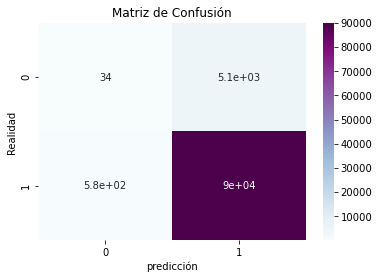

In [498]:
f,ax=plt.subplots()

sns.heatmap(confusion_matrix, annot=True, ax=ax, cmap="BuPu") #Dibuja un mapa de calor

ax.set_title('Matriz de Confusión') #título
ax.set_xlabel('predicción') #eje x
ax.set_ylabel('Realidad') #eje y

> Se puede observar que: 
- 34 de los datos eran False y el modelo los ha predicho correctamente (0,0)
- Un 9e+04 de los datos eran True y el modelo los ha predicho correctamente (1,1)
- Un 5.8e+04 de los datos eran True pero el modelo los ha predicho como False (1,0)
- Un 5.1e+04 de los datos eran False pero el modelo los ha predicho como True (0,1)

## Regresión Lineal

Es un modelo matemático usado para aproximar la relación de dependencia entre una variable dependiente variables independientes y un término aleatorio. Este método es aplicable en muchas situaciones en las que se estudia la relación entre dos o más variables o predecir un comportamiento, algunas incluso sin relación con la tecnología.

Para este caso se utilizará el carburante <b>diesel_premium</b>.

### <center><u>diesel_premium</u></center>

In [540]:
df_regli1 = df_gasoline2022

In [541]:
# Se establece un rango
scaler = MinMaxScaler(feature_range=(0, 2.3))
# Se modifican las columnas seleccionadas
df_norm = df_regli1[["day", "diesel_premium"]]
for col in df_norm:
    df_regli1[[col]]=scaler.fit_transform(df_regli1[[col]])
    
df_regli1.head()

,station_id,region_name,municipality_name,year,month,day,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,diesel_A,diesel_B,diesel_premium,biodiesel
0,4312,Madrid,Madrid,0.0,2.40,0.153333,2.169986,2.347345,0.0,0.000000,2.005,0.0,2.120964,0.0
1,3201,Madrid,Madrid,0.0,2.40,0.000000,2.099955,0.000000,0.0,2.260523,1.959,0.0,2.084343,0.0
2,3222,Madrid,Torrejón de la Calzada,0.0,0.96,0.230000,1.739791,1.894515,0.0,0.000000,1.655,0.0,1.764927,0.0
3,4600,Madrid,Madrid,0.0,0.96,1.840000,1.889859,0.000000,0.0,2.021420,1.919,0.0,2.033481,0.0
4,4364,Madrid,Navacerrada,0.0,0.48,1.840000,1.664757,1.836595,0.0,1.789290,1.549,0.0,1.657099,0.0


In [542]:
Y = df_regli1["diesel_premium"]
X = df_regli1[["day"]]

In [543]:
# Se crea el modelo linearRegression
regr = linear_model.LinearRegression()
# Se entrena el modelo
regr.fit(X, Y)

# Se imprimen los coeficientes 
print("Coeficientes: ", regr.coef_)

Y_pred = regr.predict(X)
# R2 nos va a decir cuán bueno es el modelo, cuanto más próximo a 1, el modelo es mejor.
print("R cuadrado: ", r2_score(Y, Y_pred))

Coeficientes:  [0.02789976]
R cuadrado:  0.000731013716678719


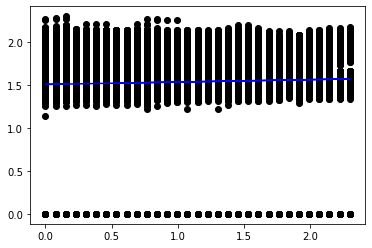

In [544]:
# Mostramos los resultados de forma gráfica, junto con la recta de regresión.
plt.scatter(X, Y, color = "black")
plt.plot(X, Y_pred, color = "blue")
plt.show()

> Se puede observar que:
- La precisión de este modelo es muy baja, con un valor del 0.073% por lo su funcionamiento es pésimo.

### <center><u>biodiesel</u></center>

Sobre el último carburante no se va a realizar ninguna predicción ya que no guarda comparativa con ninguna de las variables del conjunto de datos, como se podía observar en la gráfica de correlación.

## <center><u>Conclusiones</u></center>